# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#6">Training datasets</a>
7. <a href="#7">Improvement ideas</a>
8. <a href="#8">clustering analysis</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [3]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

In [4]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
sum(df.duplicated())

0

In [8]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [9]:
df[df.MINIMUM_PAYMENTS == df.MINIMUM_PAYMENTS.max()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4376  C14499  10571.41107                1.0    7739.48               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4376                 7739.48           0.0                  1.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4376                         0.0                               1.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4376                     0.0                 0             44        8000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4376  2688.447014       76406.20752               0.0      12

**check the linear correlation between features and delete one of the features of there is a strong corr:**

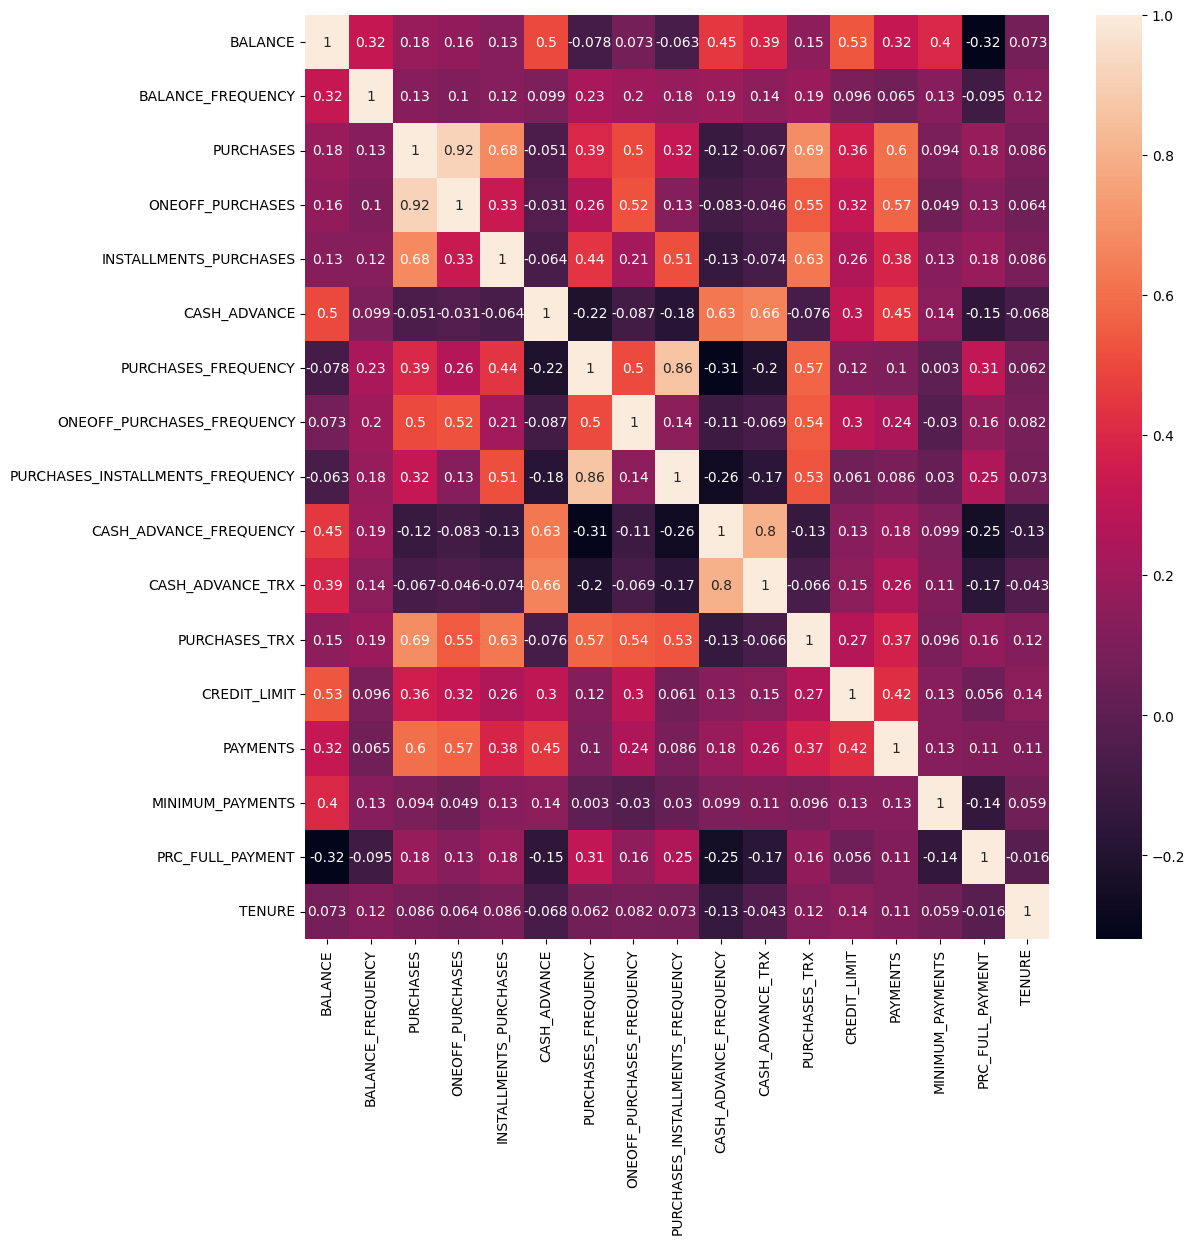

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

### General Observations
- Data types are correct
- No duplicated rows
- There is some missing values in "CREDIT_LIMIT" and "MINIMUM_PAYMENTS" columns, 1 and 313 values respectively
- The distribution of most of the columns are right-skewed
- There is a strong linear correlation between (ONEOFF_PURCHASES, PURCHASES), (PURCHASES_INSTALLMENTS_FREQUENCY, PURCHASES_FREQUENCY) and (CASH_ADVANCE_TRX, CASH_ADVANCE_FREQUENCY)

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


In [11]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology
- start by defining the solution
- apply this solution on the data
- test the solution to make sure that you have solved the issue

**First issue** <br>
Drop CUST_ID as it does not have any information:

In [12]:
df_copy.shape

(8950, 18)

In [13]:
df_copy.drop('CUST_ID', axis=1, inplace=True)

In [14]:
df_copy.shape

(8950, 17)

**Second issue** <br>
Missing value in "CREDIT_LIMIT" and "MINIMUM_PAYMENTS" columns with the median as the distribution in both of the is skewed

In [15]:
#solution
df_copy = df_copy.fillna(df_copy.median())

In [16]:
#test
df_copy.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**identifying outliers** <br>
we couldn't plot boxplot before filling the nulls

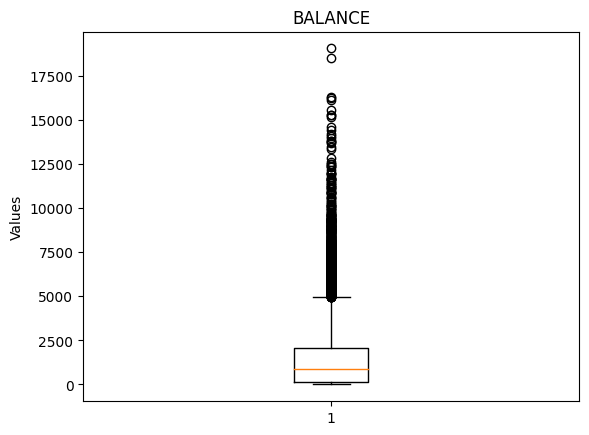

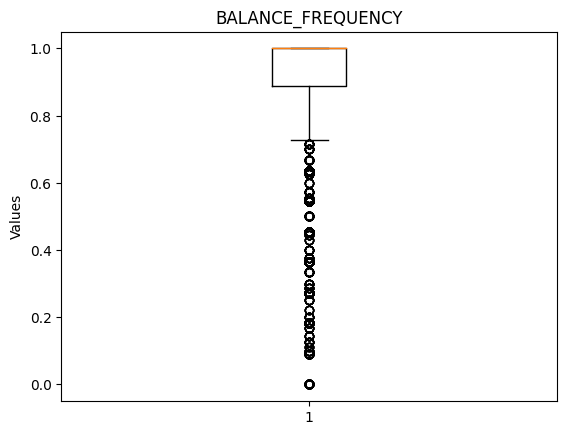

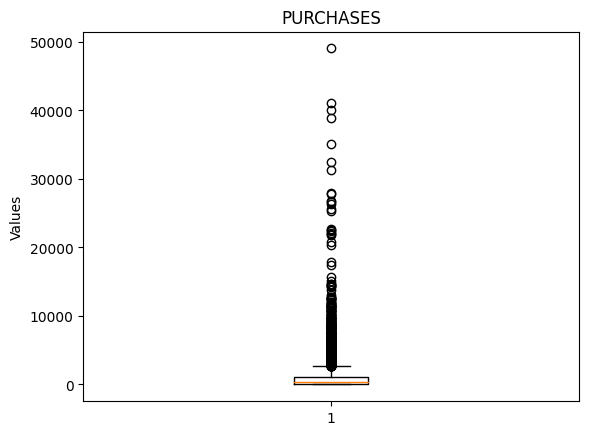

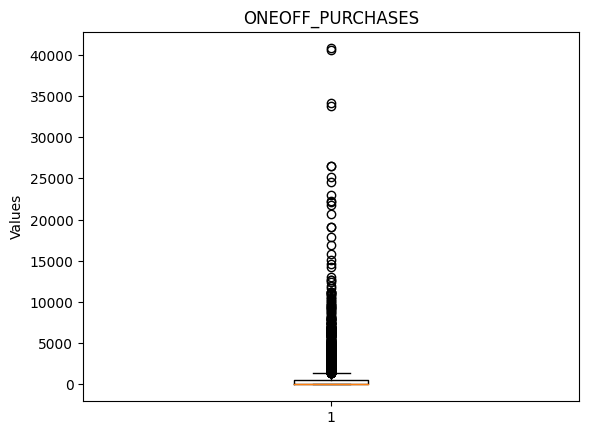

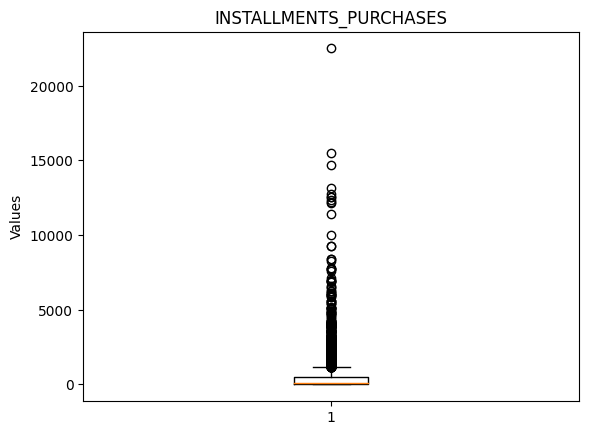

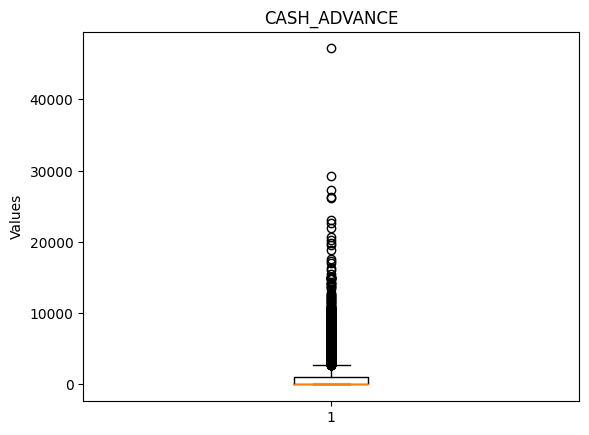

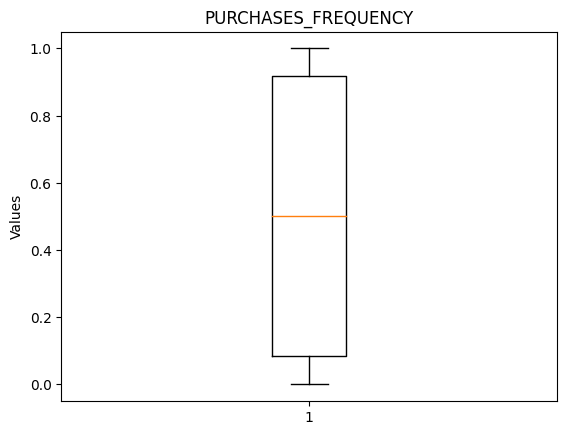

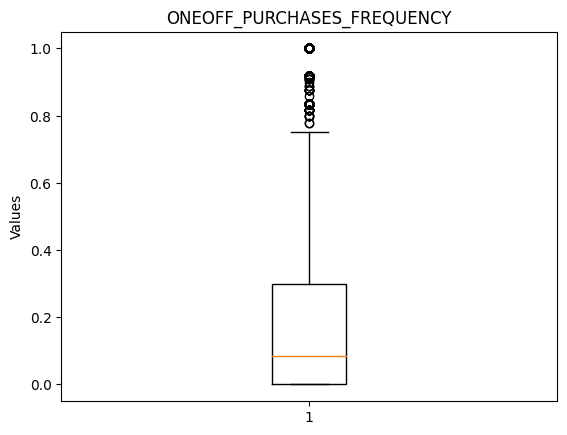

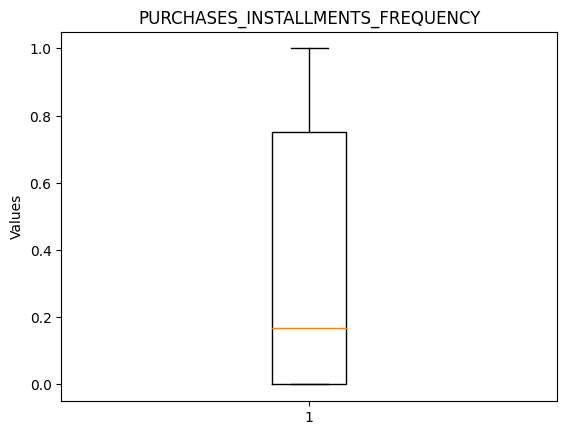

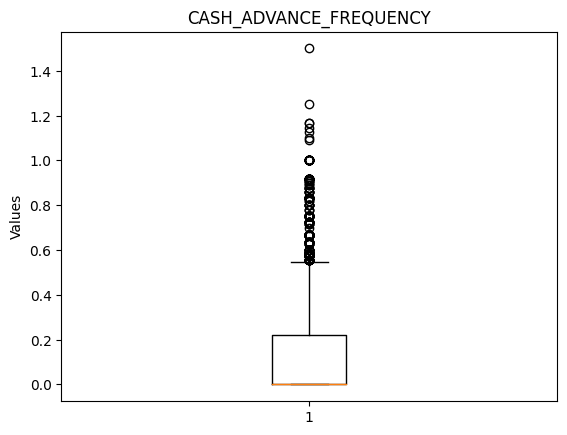

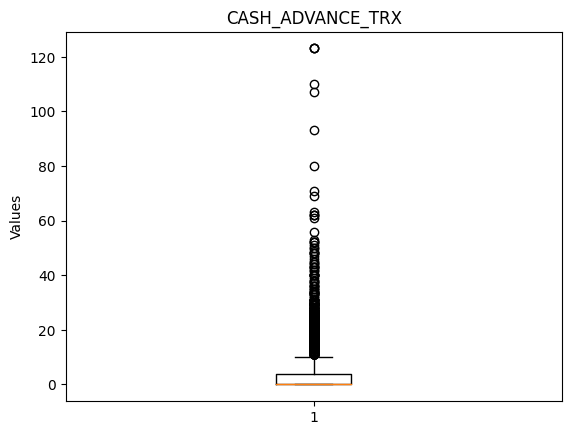

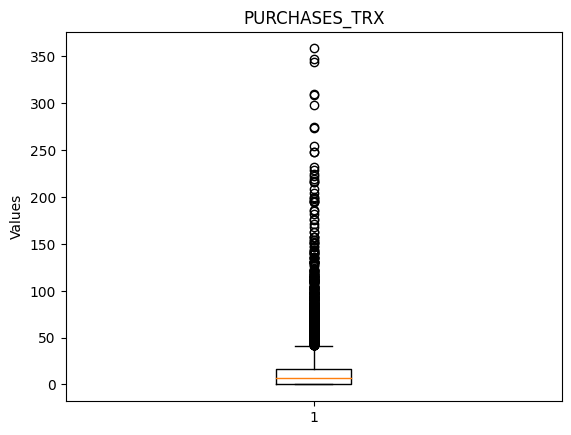

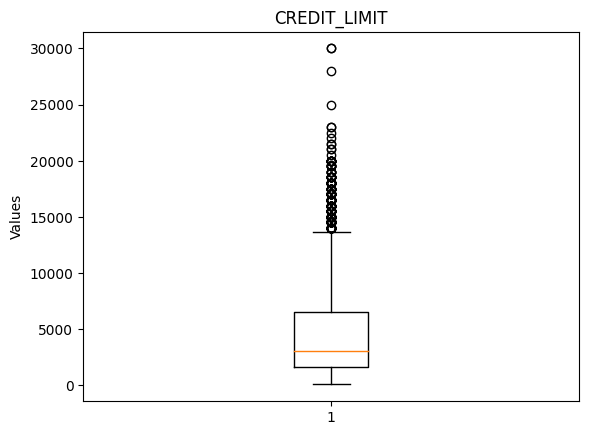

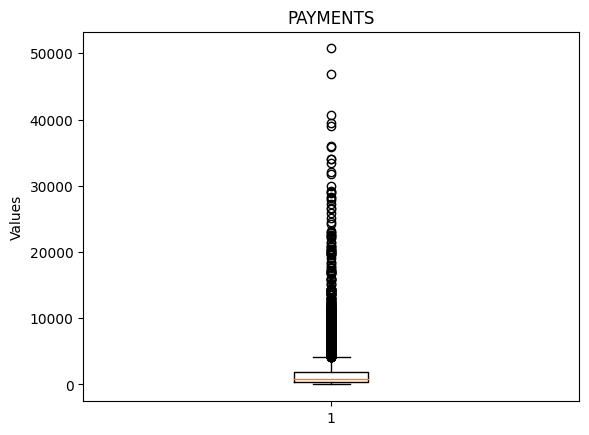

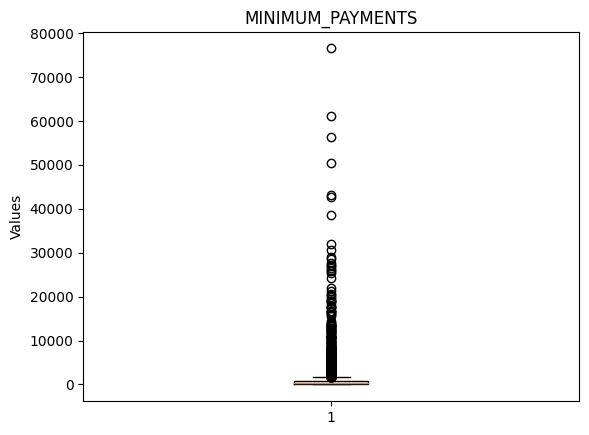

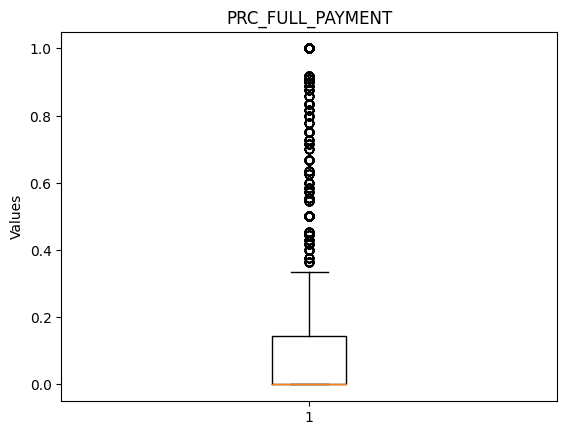

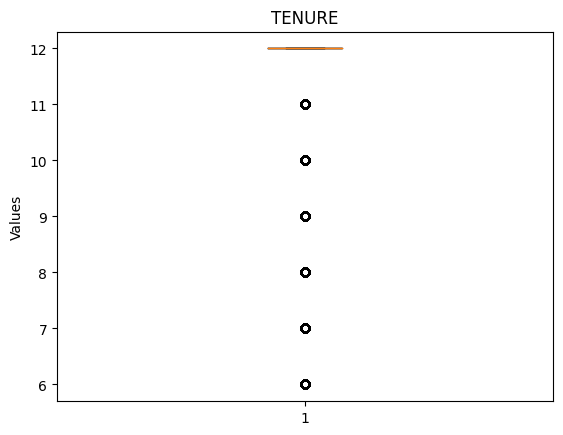

In [17]:
for column in df_copy.columns:
    if df_copy[column].dtype != 'object':
        plt.figure()
        plt.boxplot(df_copy[column])
        plt.title(column)
        plt.ylabel('Values')
        plt.show()

There are some outliers but they are reasonable and part of the data so I won't drop them

**Third issue** <br>
We have some highly correlated features, we'll drop them as they have redundant information

In [ ]:
# df_copy.drop(['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX'], axis=1, inplace=True)

In [18]:
df_copy.drop(['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'], axis=1, inplace=True)

In [19]:
df_copy.shape

(8950, 15)

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

**Answer here:** <br>
Apply log transformation to right-skewed columns<br>
Let's visualize the distribution before and after the transformation to see the differences

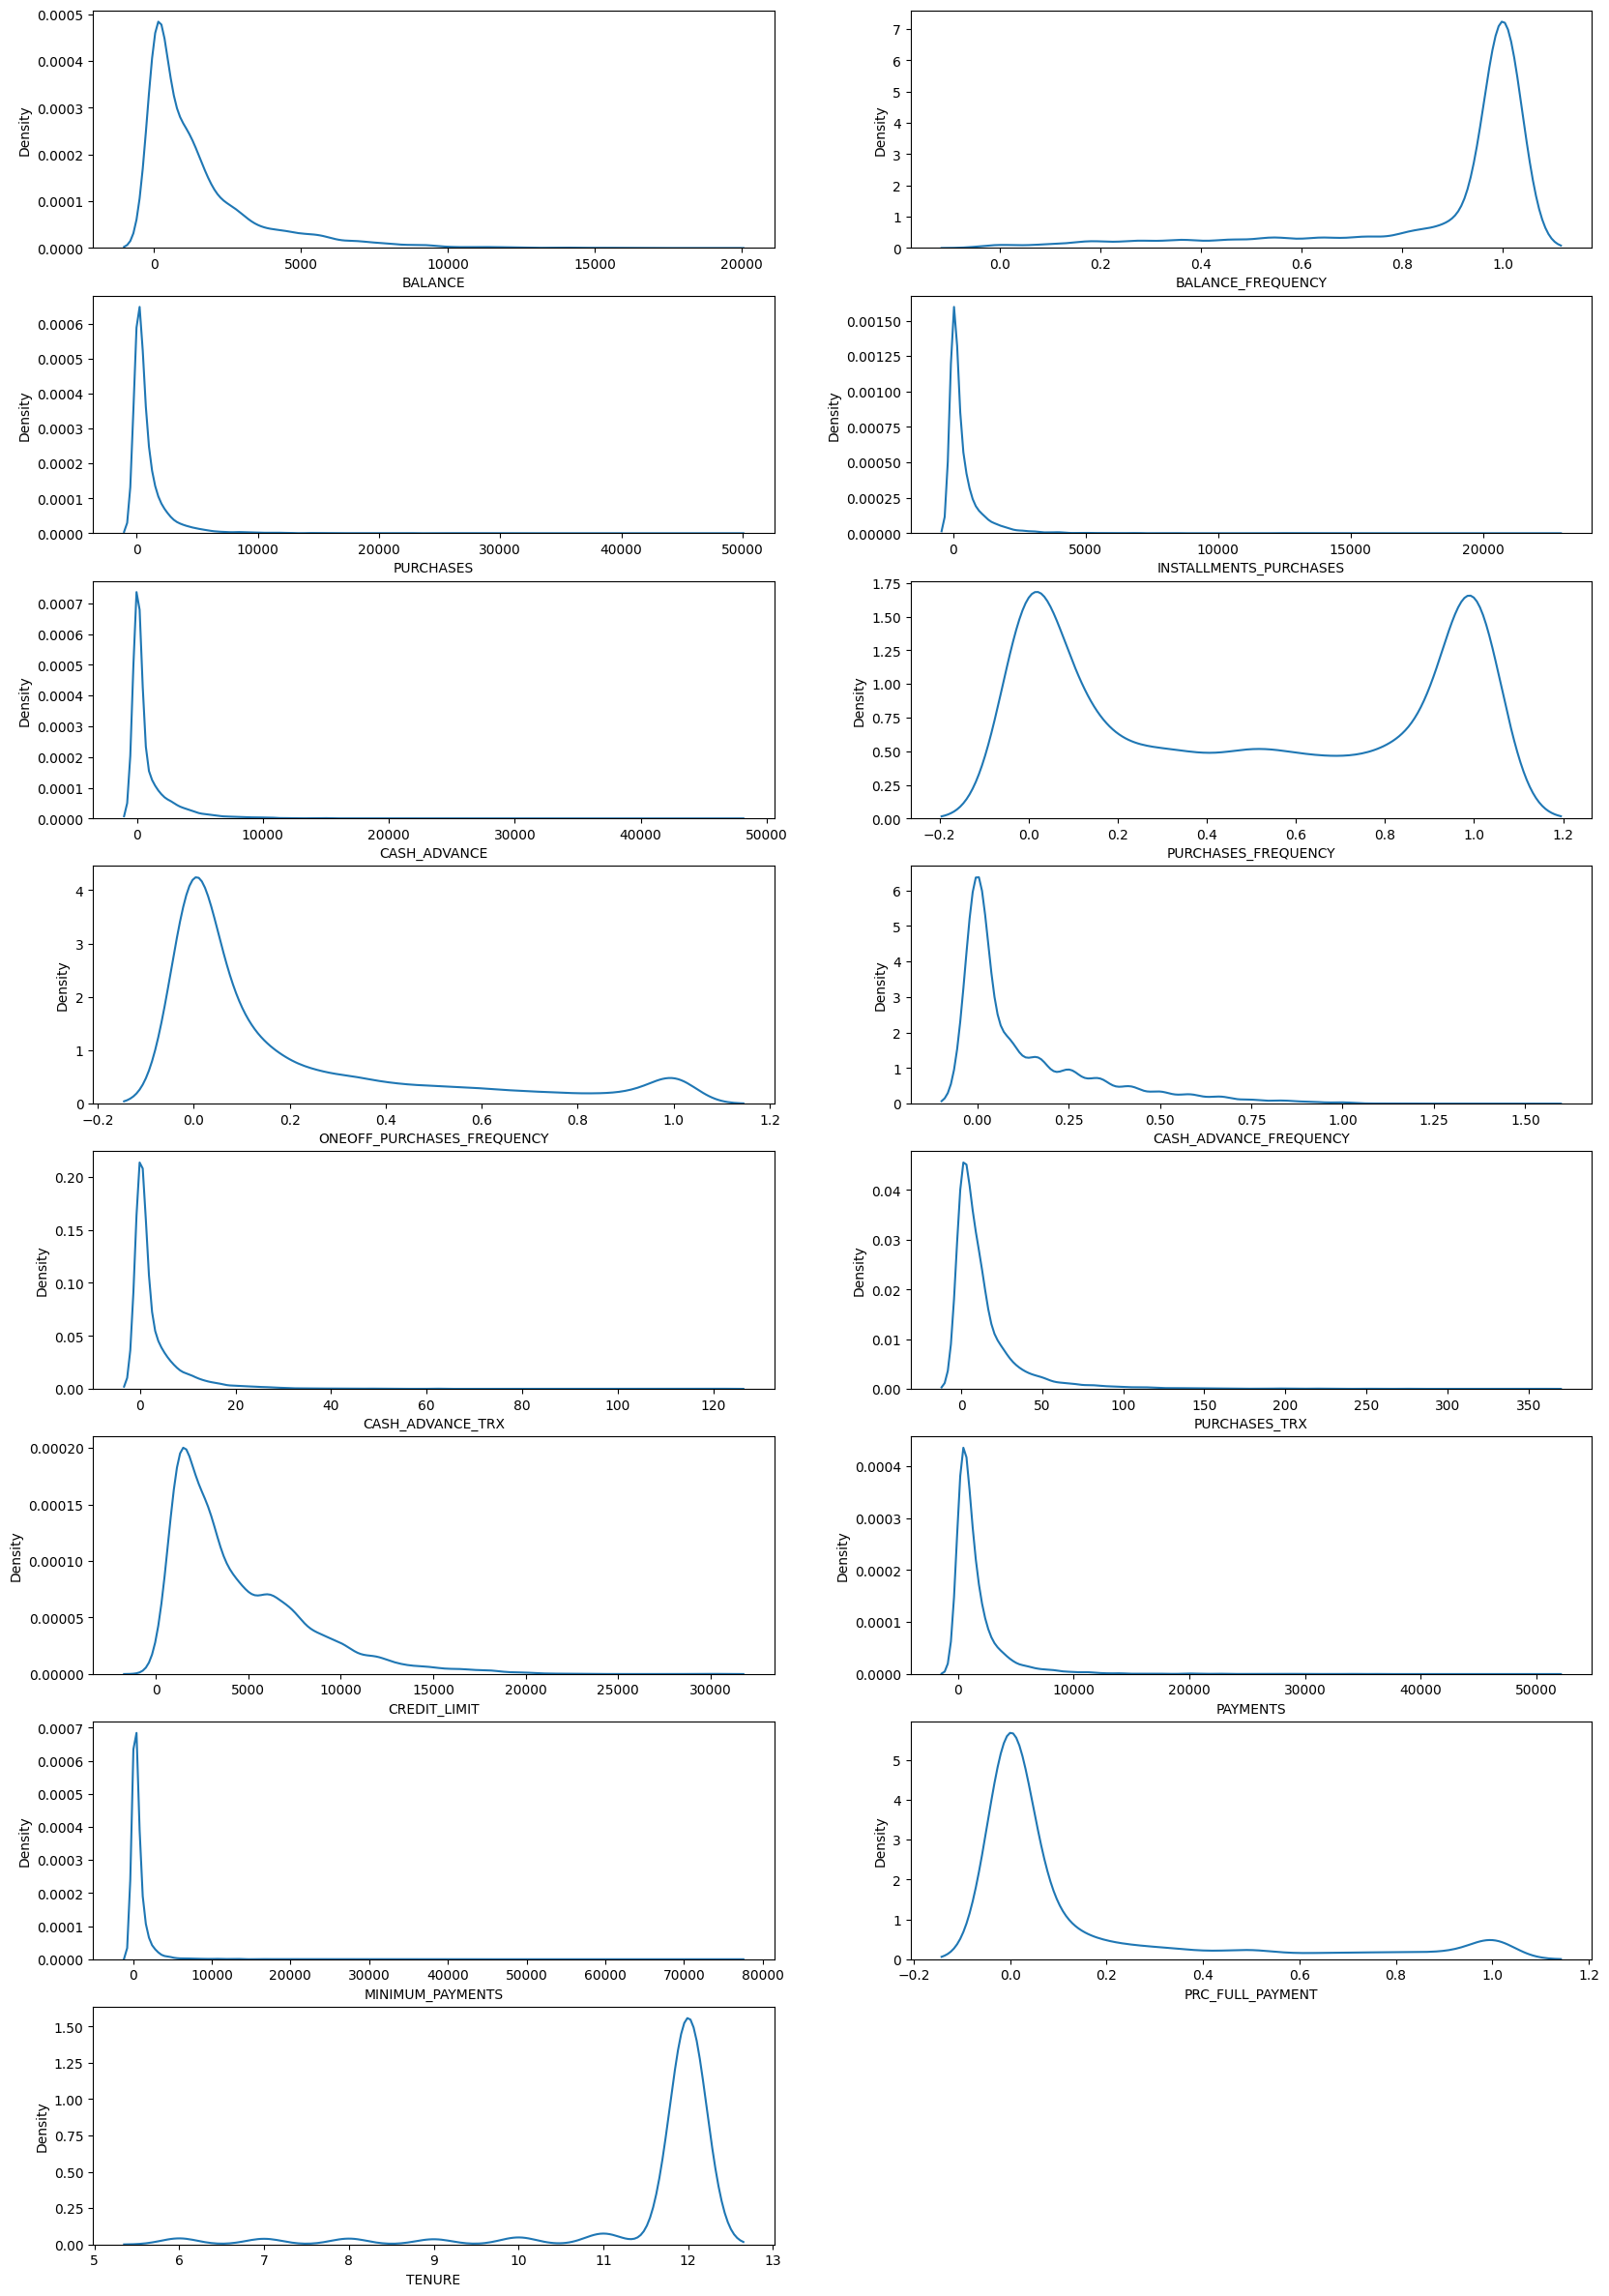

In [20]:
plt.figure(figsize=(20,30))
for i, col in enumerate(df_copy.columns):
    if df_copy[col].dtype != 'object':
        ax = plt.subplot(8, 2, i+1)
        sns.kdeplot(df_copy[col], ax=ax)
        plt.xlabel(col)

plt.show()

In [21]:
right_skewed_cols = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [22]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=True)
df_copy[right_skewed_cols] = log_transformer.transform(df_copy[right_skewed_cols])

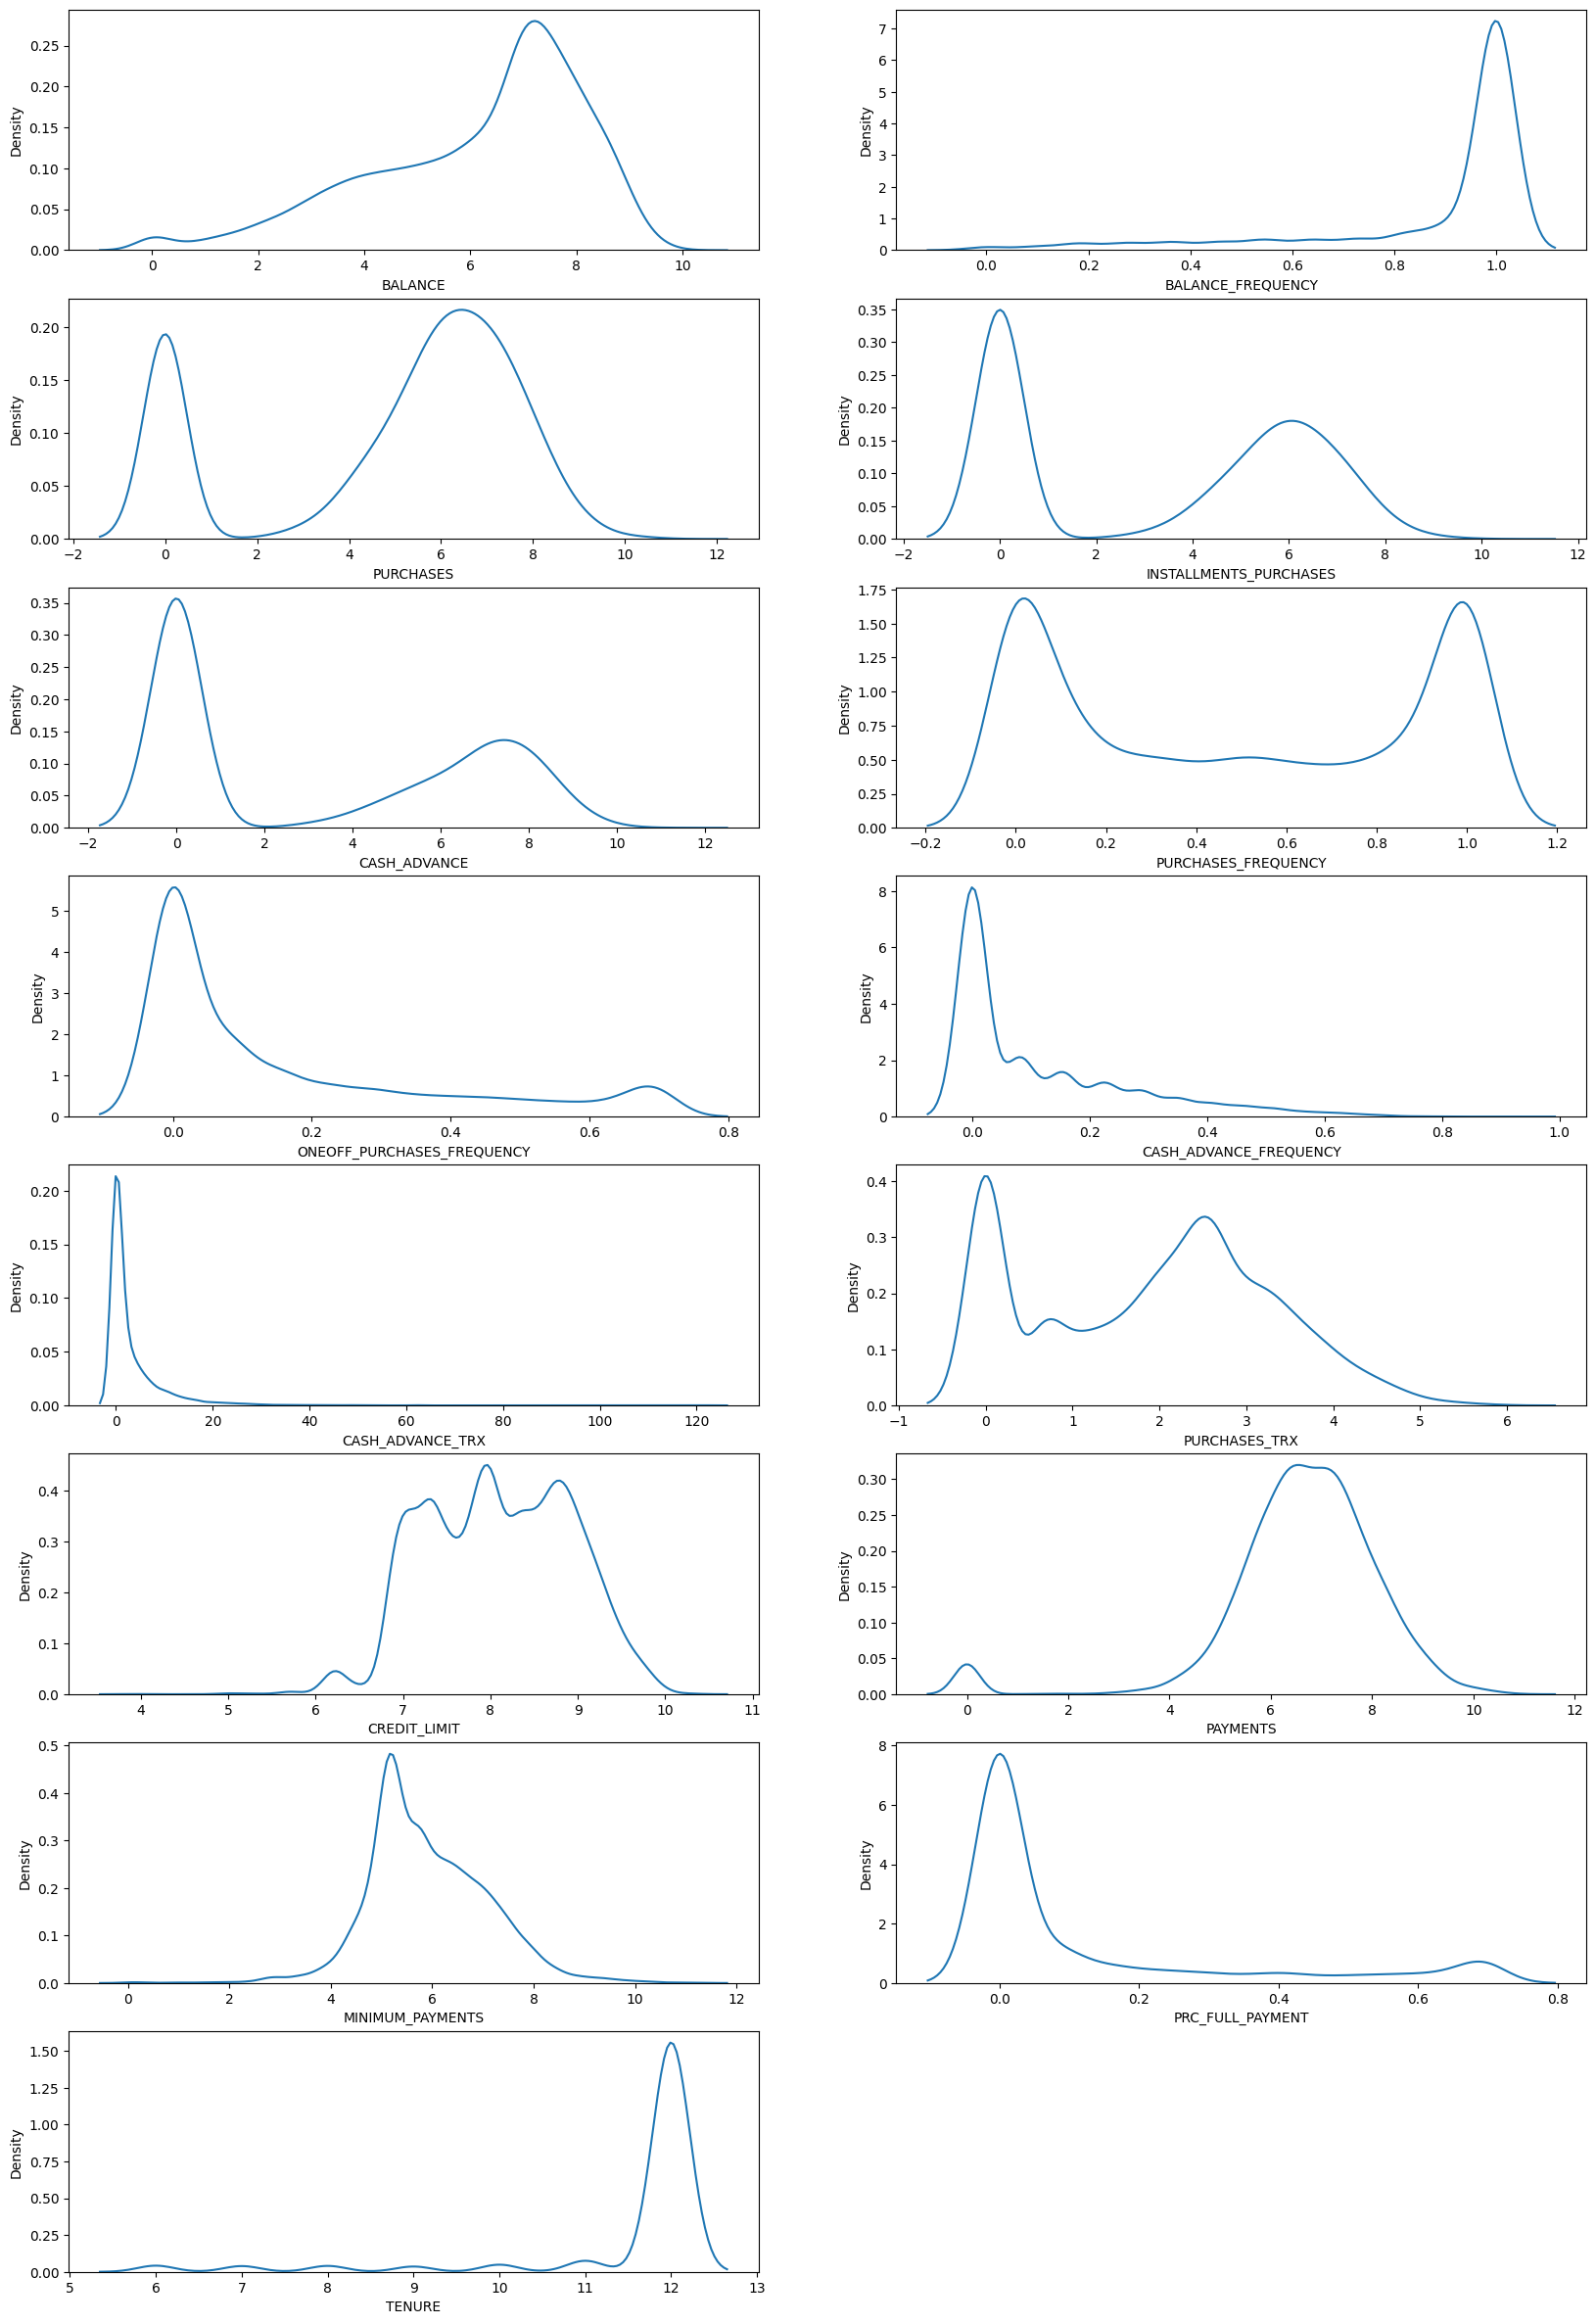

In [23]:
plt.figure(figsize=(20,30))
for i, col in enumerate(df_copy.columns):
    if df_copy[col].dtype != 'object':
        ax = plt.subplot(8, 2, i+1)
        sns.kdeplot(df_copy[col], ax=ax)
        plt.xlabel(col)

plt.show()

Although the distribution might not seem perfect, the transformation we applied has enhanced it compared to its initial state.<br>
Ranges of the features are still not the same so I will apply standard transformation.

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(df_copy)
scaled_df = scaler.transform(df_copy)

norm_scaler = MinMaxScaler()
norm_scaler.fit(df_copy)
norm_df = norm_scaler.transform(df_copy)

## 5. <a name="5">K Means</a>
(<a href="#0">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you
5- Using different techniques for scaling and comment on the result

In [25]:
import random
def kMeansInitCentroids(X, K):
    m= X.shape[0]
    centroids = X[np.random.choice(m,K,replace=False),:]
#     print(centroids.shape)
    return centroids

def findClosestCentroids(X, centroids):
    idx=[]
    m=X.shape[0]
    centroids=np.array(centroids)
    K=centroids.shape[0]
    n=centroids.shape[1]
    X=X.reshape(m,1,n)
    centroids=centroids.reshape(1,K,n)
    idx=np.argmin(np.sum((X-centroids)**2,axis=2),axis=1)
    return idx

def computeCentroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for c in range(K):
        points = X[idx==c]
        cen = points.mean(axis=0)
        centroids[c]= cen
    return centroids

class K_means():
    def __init__(self, K, max_iters):
        self.K = K
        self.max_iters = max_iters
    def fit(self, X):
        self.centroids=kMeansInitCentroids(X,self.K)
        for i in range(self.max_iters):
            self.idx=findClosestCentroids(X,self.centroids)
            self.centroids=computeCentroids(X,self.idx,self.K)
        return self.centroids
    def predict(self,X):
        return findClosestCentroids(X,self.centroids)

In [29]:
km=K_means(4, 500)
km.fit(norm_df)
labels = km.predict(norm_df)

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 500)
kmeans.fit(norm_df)
labels1 = kmeans.predict(norm_df)

In [30]:
# compare between manual and sklearn Kmeans
from sklearn.metrics import mean_squared_error
mean_squared_error(labels, labels1)

0.6358659217877095

note: there is a slight difference between the two results

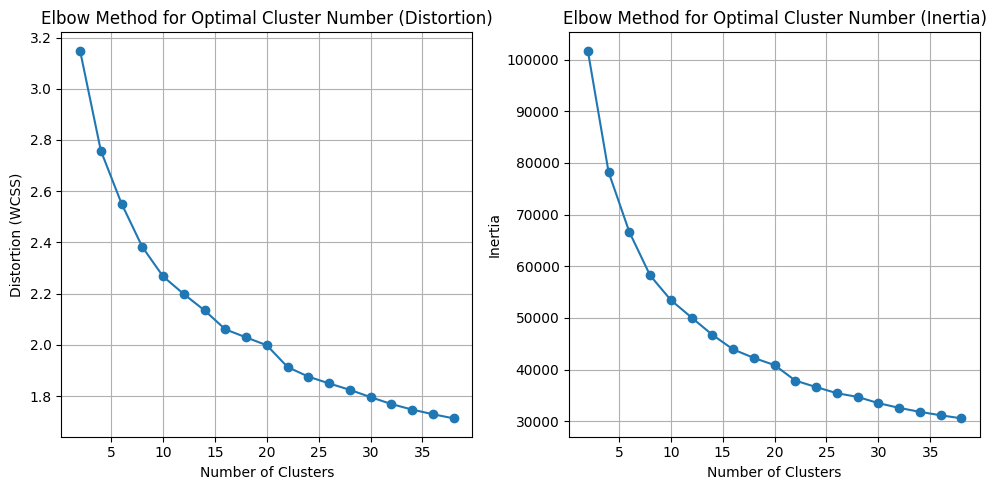

In [31]:
# log then standard transformation
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

num_clusters_range = range(2, 40, 2)
distortions = []
inertias = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42, n_init = "auto")
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(scaled_df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])

# Plot the distortion values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(num_clusters_range, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (WCSS)')
plt.title('Elbow Method for Optimal Cluster Number (Distortion)')
plt.tight_layout()
plt.grid()

# Plot the inertia values
plt.subplot(1, 2, 2)
plt.plot(num_clusters_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number (Inertia)')

plt.tight_layout()
plt.grid()
plt.show()

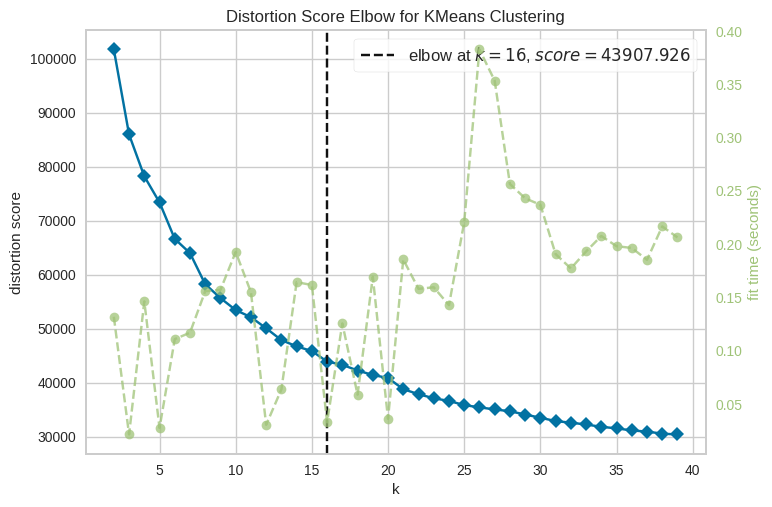

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2,40))

visualizer.fit(scaled_df)
visualizer.show()

In [33]:
k_means = KMeans(n_clusters = 13, random_state = 42, n_init = 'auto')
k_means.fit(scaled_df)
labels = k_means.predict(scaled_df)
df_copy['label'] = labels

In [44]:
from sklearn.manifold import TSNE
import plotly.express as px
tsne = TSNE(init='pca', n_components=2, perplexity=100, learning_rate=100)
tsne_data = tsne.fit_transform(scaled_df)

cluster_labels = df_copy['label']


<Axes: xlabel='PC1', ylabel='PC2'>

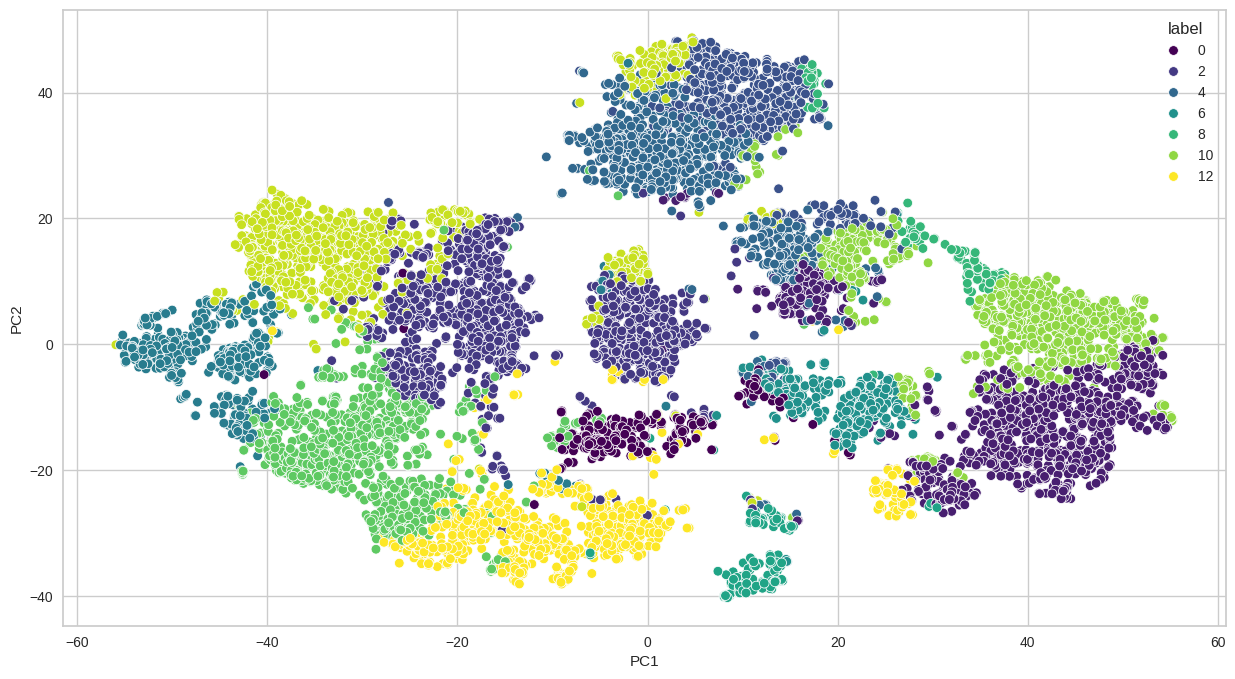

In [45]:
tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])
tsne_df['label'] = labels

plt.figure(figsize=(15, 8))
sns.scatterplot(data=tsne_df, x="PC1", y="PC2", hue="label", palette='viridis')

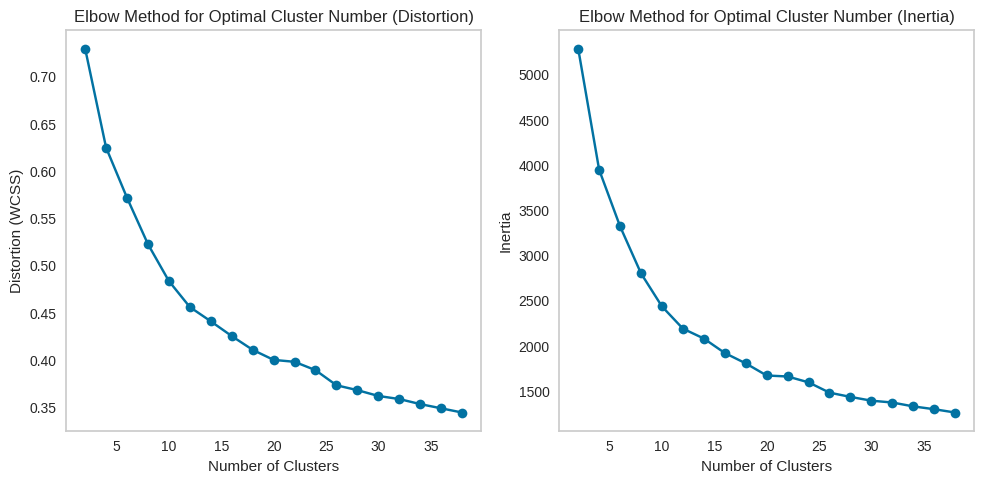

In [46]:
# log then minmax transformation
from sklearn.cluster import KMeans

num_clusters_range = range(2, 40, 2)
distortions = []
inertias = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42, n_init = "auto")
    kmeans.fit(norm_df)
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(norm_df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / norm_df.shape[0])

# Plot the distortion values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(num_clusters_range, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (WCSS)')
plt.title('Elbow Method for Optimal Cluster Number (Distortion)')
plt.tight_layout()
plt.grid()

# Plot the inertia values
plt.subplot(1, 2, 2)
plt.plot(num_clusters_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number (Inertia)')

plt.tight_layout()
plt.grid()
plt.show()

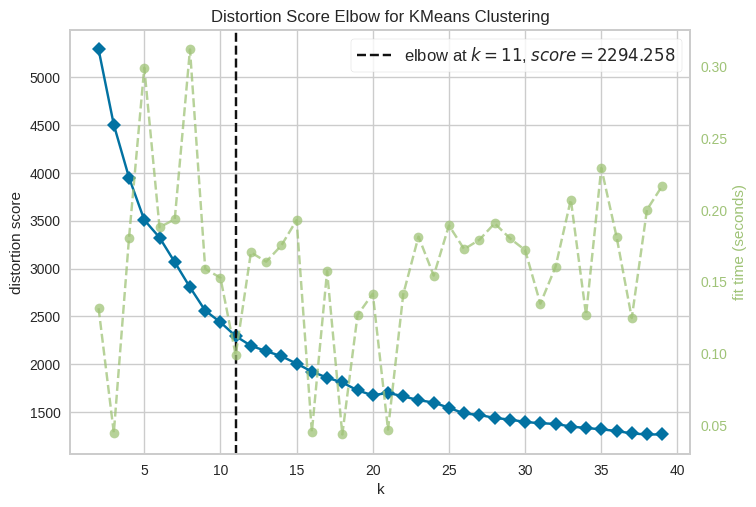

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2,40))

visualizer.fit(norm_df)
visualizer.show()

In [48]:
k_means = KMeans(n_clusters = 11, random_state = 42, n_init = 'auto')
k_means.fit(norm_df)
labels = k_means.predict(norm_df)
df_copy['label'] = labels

<Axes: xlabel='PC1', ylabel='PC2'>

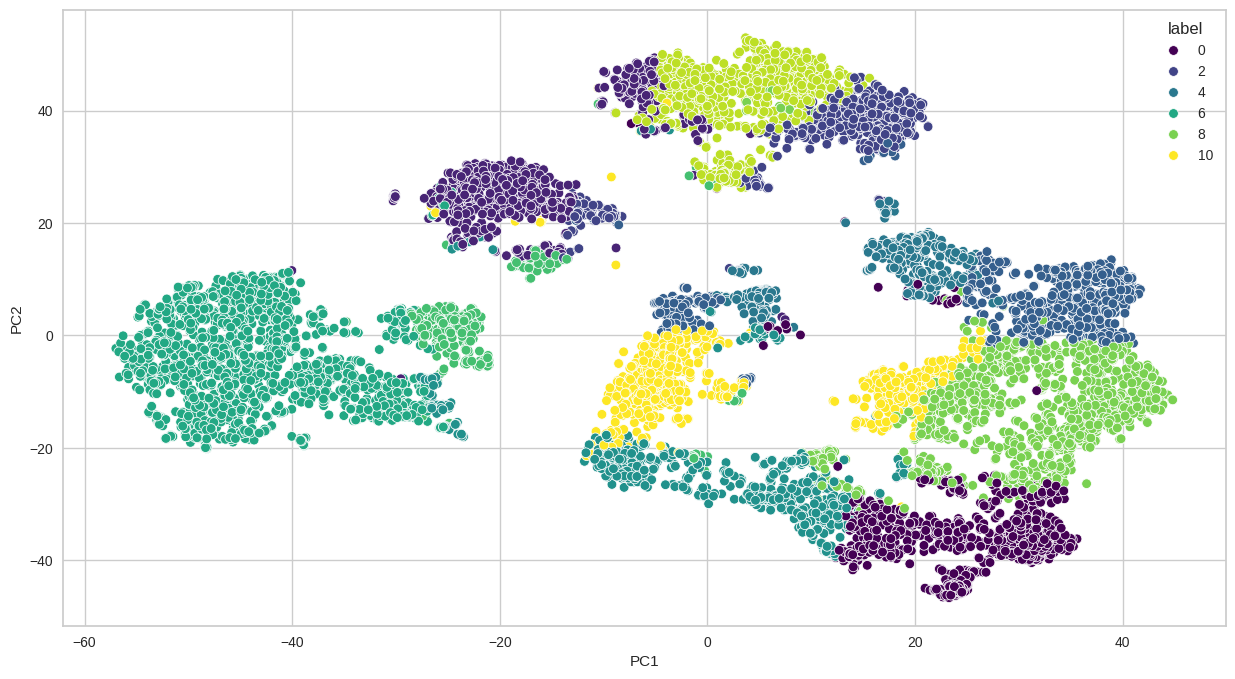

In [49]:
tsne = TSNE(init='pca', n_components=2, perplexity=100, learning_rate=100)
tsne_data = tsne.fit_transform(norm_df)

cluster_labels = df_copy['label']

tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])
tsne_df['label'] = labels

plt.figure(figsize=(15, 8))
sns.scatterplot(data=tsne_df, x="PC1", y="PC2", hue="label", palette='viridis')

<Axes: xlabel='PC1', ylabel='PC2'>

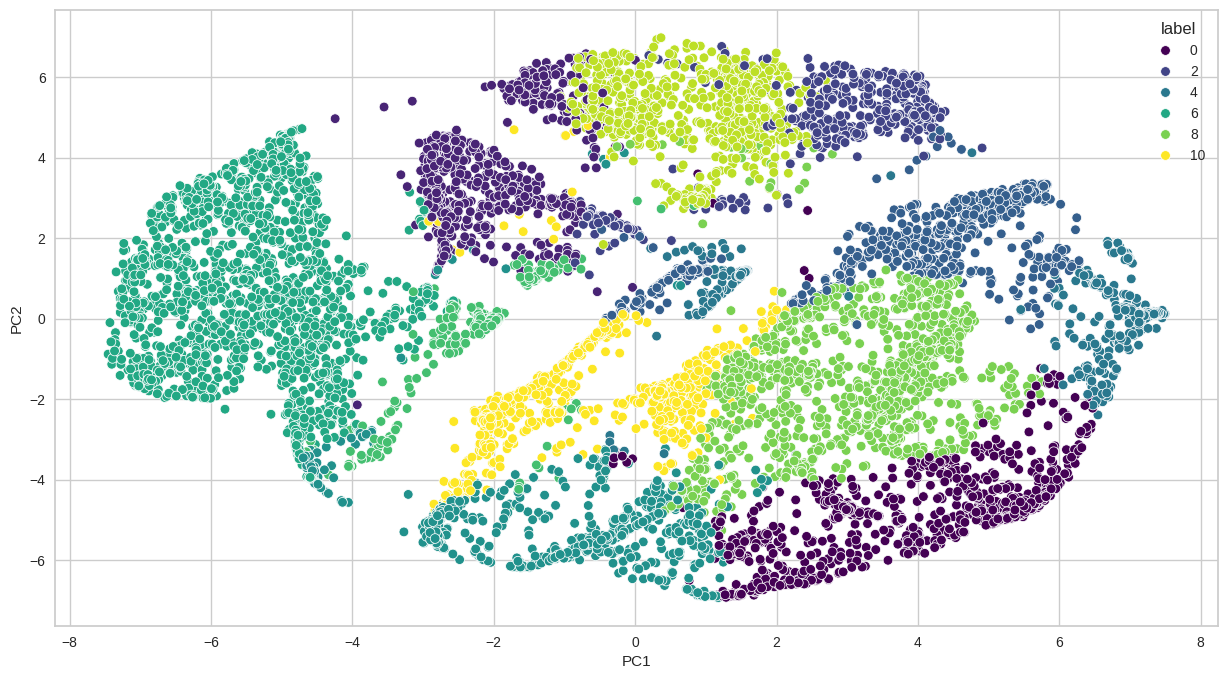

In [50]:
tsne = TSNE(init='pca', n_components=2, perplexity=100, learning_rate=0.5)
tsne_data = tsne.fit_transform(norm_df)

cluster_labels = df_copy['label']

tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])
tsne_df['label'] = labels

plt.figure(figsize=(15, 8))
sns.scatterplot(data=tsne_df, x="PC1", y="PC2", hue="label", palette='viridis')

## 6. <a name="6">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance
    - Manhattan Distance
    - Mahalanobis distance
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

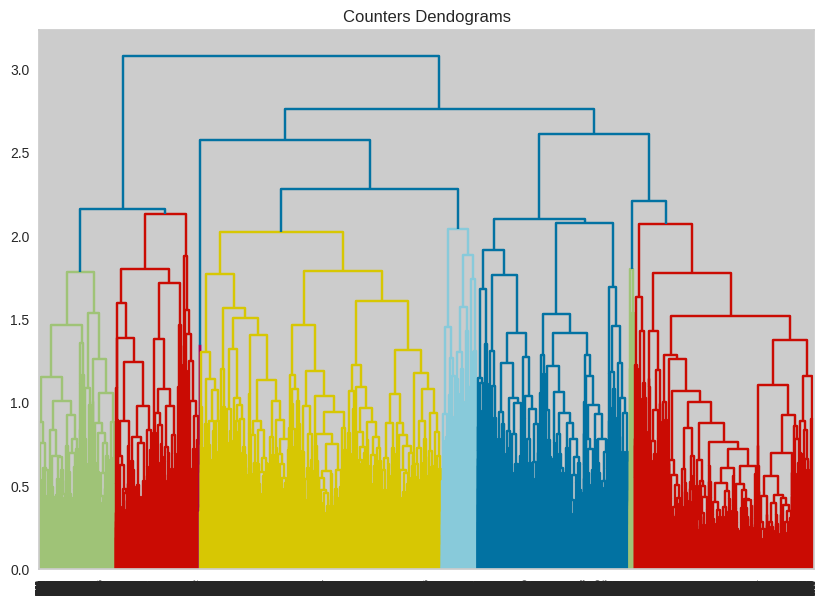

In [51]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=norm_df, method='complete', metric='euclidean'))

In [52]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42, n_init = 'auto')
label =  kmeans.fit_predict(norm_df)
df_copy['label'] = label
silhouette_score(norm_df, label)

0.26517884154193916

silhouette_score is not the proper way to evaluate this clustering problem

In [53]:
#training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(norm_df)

In [54]:
clustering.n_clusters_

2

AgglomerativeClustering is not proper algorithm to this clustering problem because its sensitivity to noise and outliers

## 7. <a name="7">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method

In [55]:
# use PCA
from sklearn.decomposition import PCA, FactorAnalysis
pca = PCA(n_components = 7)
pca.fit(norm_df)

PCA(n_components=7)

In [56]:
norm_df.shape

(8950, 15)

In [57]:
data_pca = pca.transform(norm_df)
data_pca.shape

(8950, 7)

In [58]:
print("variance ratio: ", pca.explained_variance_ratio_)

variance ratio:  [0.45410341 0.17160449 0.08610047 0.08300153 0.06118779 0.0477652
 0.026842  ]


In [59]:
print("sum: ",sum(pca.explained_variance_ratio_))

sum:  0.9306049001227855


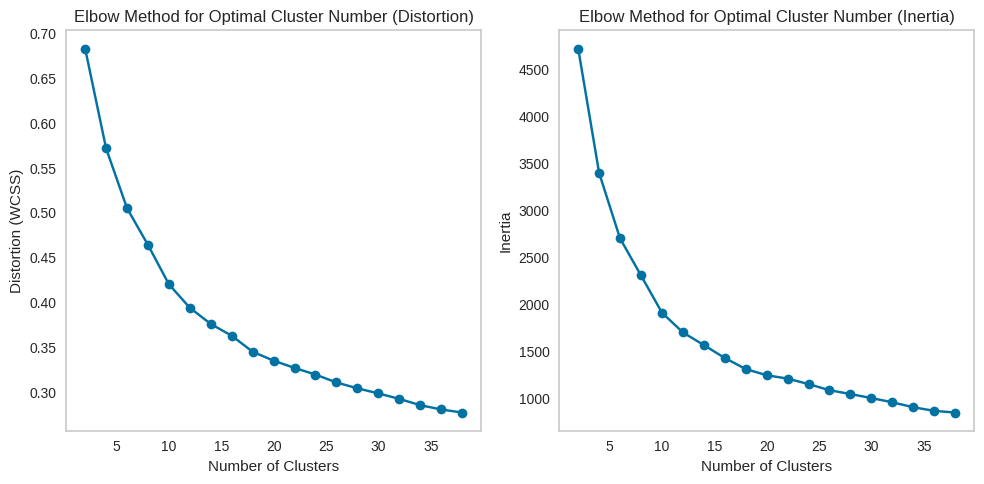

In [60]:
# log then standard transformation   data_pca
from sklearn.cluster import KMeans

num_clusters_range = range(2, 40, 2)
distortions = []
inertias = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42, n_init = "auto")
    kmeans.fit(data_pca)
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(data_pca, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_pca.shape[0])

# Plot the distortion values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(num_clusters_range, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (WCSS)')
plt.title('Elbow Method for Optimal Cluster Number (Distortion)')
plt.tight_layout()
plt.grid()

# Plot the inertia values
plt.subplot(1, 2, 2)
plt.plot(num_clusters_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number (Inertia)')

plt.tight_layout()
plt.grid()
plt.show()

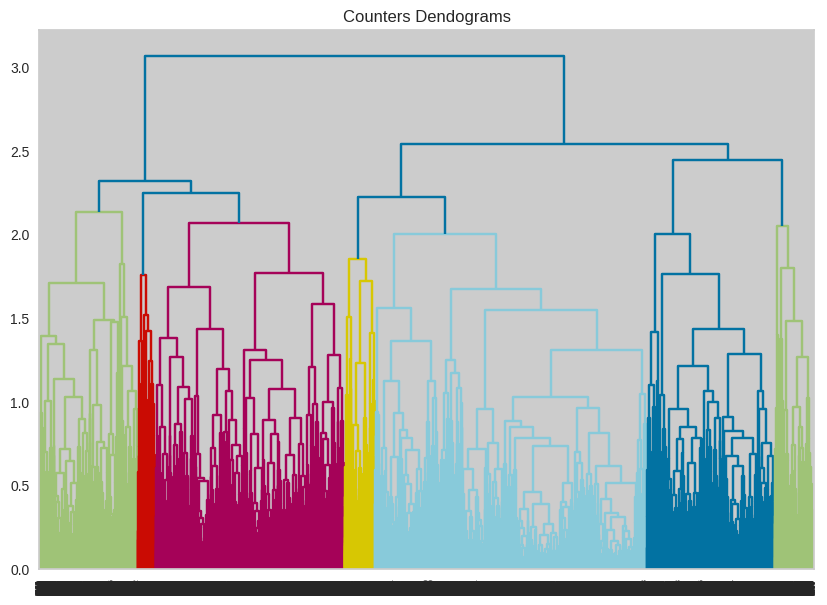

In [61]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=data_pca, method='complete', metric='euclidean'))

In [62]:
kmeans = KMeans(n_clusters=7, random_state=42, n_init = 'auto')
label = kmeans.fit_predict(data_pca)
df_copy['label'] = label

<Axes: xlabel='PC1', ylabel='PC2'>

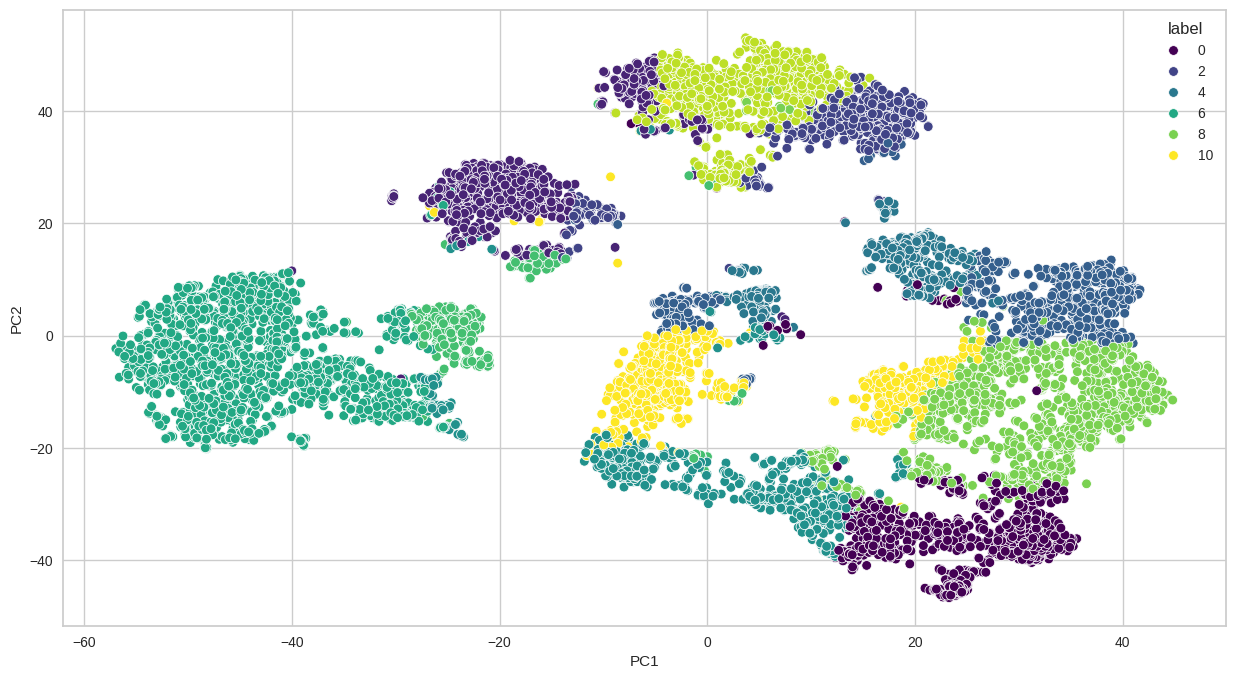

In [63]:
tsne = TSNE(init='pca', n_components=2, perplexity=100, learning_rate=100)
tsne_data = tsne.fit_transform(norm_df)

cluster_labels = df_copy['label']

tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])
tsne_df['label'] = labels

plt.figure(figsize=(15, 8))
sns.scatterplot(data=tsne_df, x="PC1", y="PC2", hue="label", palette='viridis')

## Try using robust transformation

In [64]:
# robust then minmax transformation
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df_copy)
robust_data = transformer.transform(df_copy)

norm_scaler1 = MinMaxScaler()
norm_scaler1.fit(robust_data)
norm_df1 = norm_scaler1.transform(robust_data)

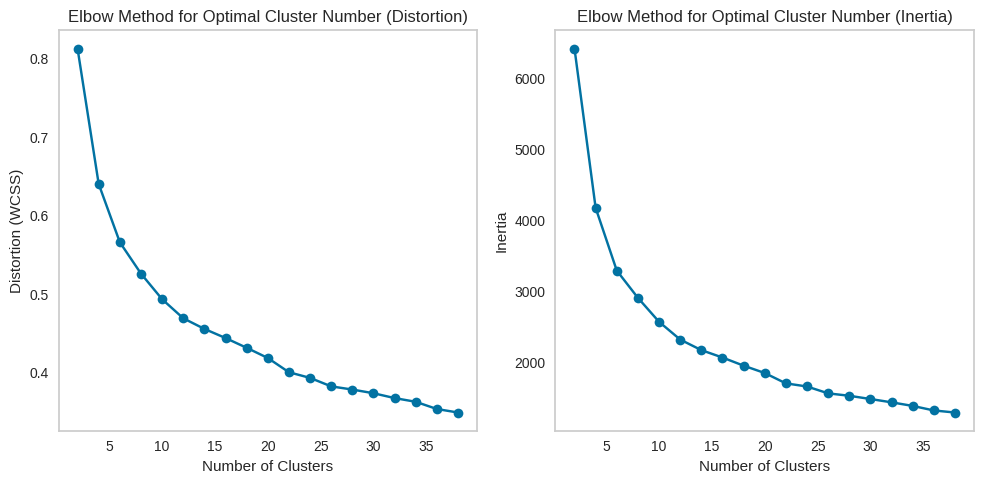

In [65]:
from sklearn.cluster import KMeans

num_clusters_range = range(2, 40, 2)
distortions = []
inertias = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42, n_init = "auto")
    kmeans.fit(norm_df1)
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(norm_df1, kmeans.cluster_centers_, 'euclidean'), axis=1)) / norm_df1.shape[0])

# Plot the distortion values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(num_clusters_range, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (WCSS)')
plt.title('Elbow Method for Optimal Cluster Number (Distortion)')
plt.tight_layout()
plt.grid()

# Plot the inertia values
plt.subplot(1, 2, 2)
plt.plot(num_clusters_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number (Inertia)')

plt.tight_layout()
plt.grid()
plt.show()

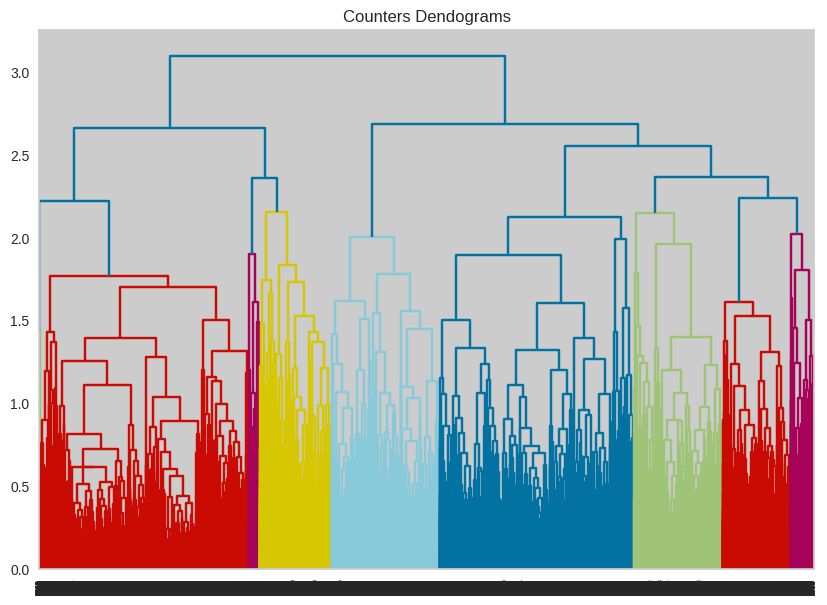

In [66]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=norm_df1, method='complete', metric='euclidean'))

In [68]:
kmeans = KMeans(n_clusters=9, random_state=42, n_init = 'auto')
label =  kmeans.fit_predict(norm_df1)
df_copy['label'] = label

In [69]:
tsne = TSNE(init='pca', n_components=2, perplexity=100, learning_rate=1000)
tsne_data = tsne.fit_transform(norm_df1)

<Axes: xlabel='PC1', ylabel='PC2'>

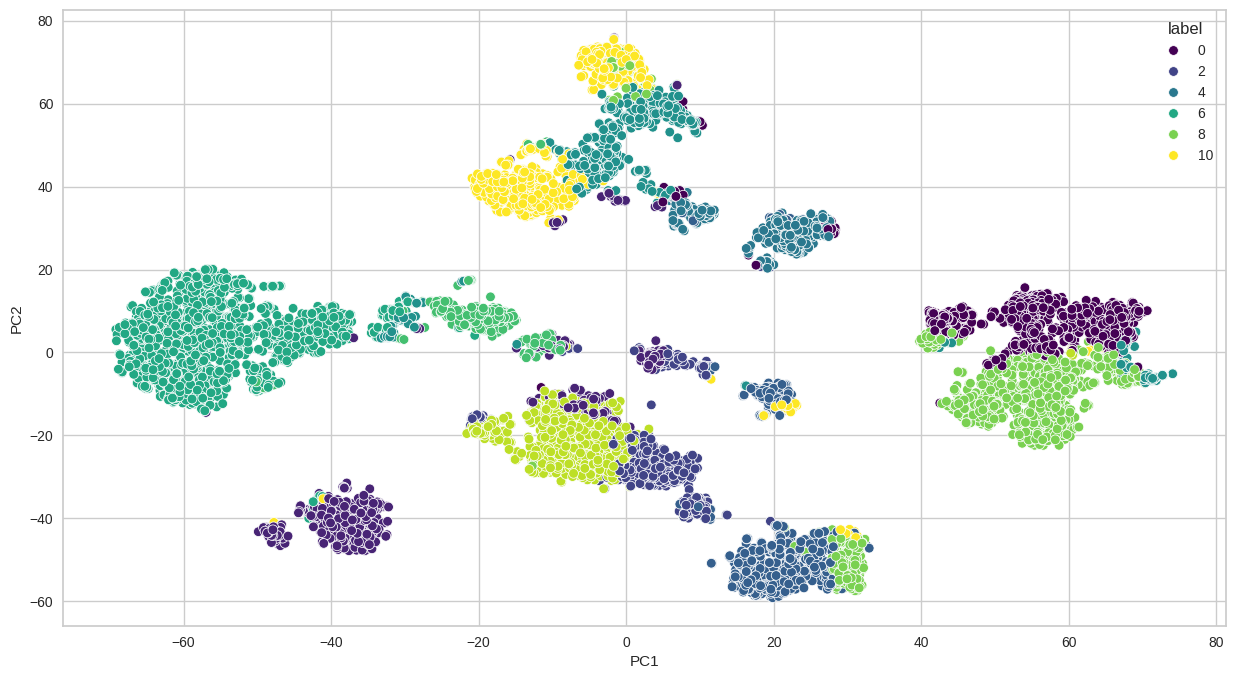

In [70]:
tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])
tsne_df['label'] = labels

plt.figure(figsize=(15, 8))
sns.scatterplot(data=tsne_df, x="PC1", y="PC2", hue="label", palette='viridis')

In [71]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init = 'auto')
label =  kmeans.fit_predict(norm_df1)
df_copy['label'] = label

<Axes: xlabel='PC1', ylabel='PC2'>

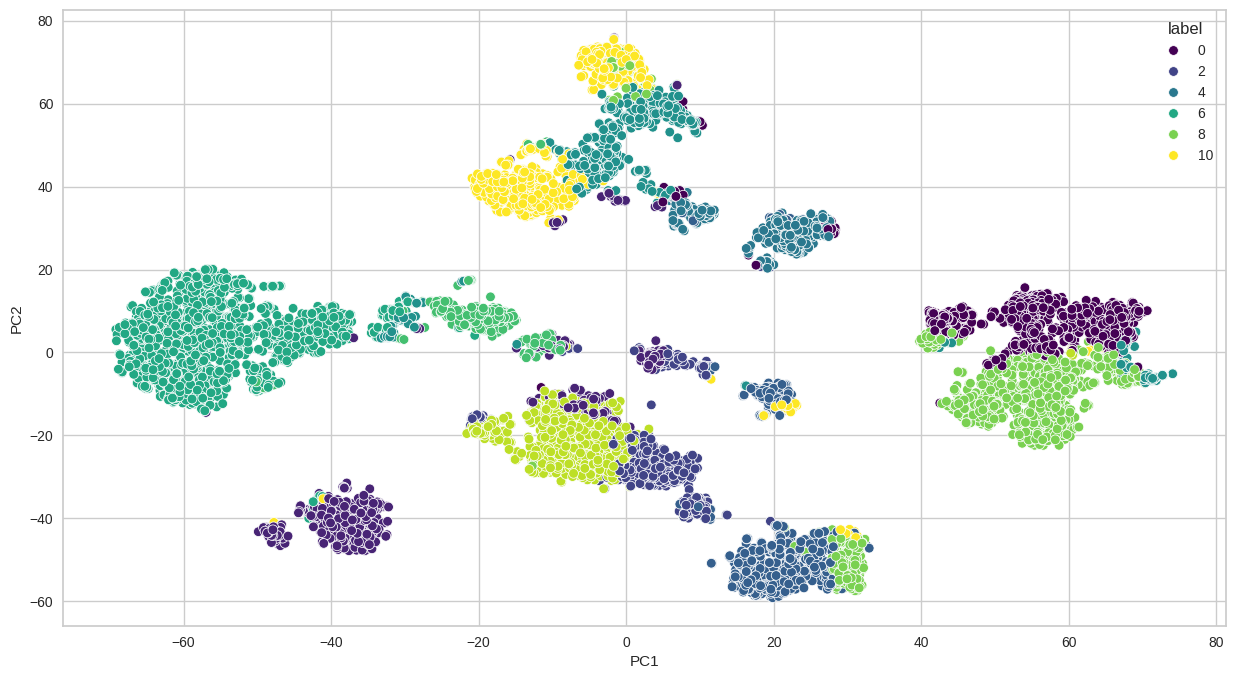

In [73]:
tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])
tsne_df['label'] = labels

plt.figure(figsize=(15, 8))
sns.scatterplot(data=tsne_df, x="PC1", y="PC2", hue="label", palette='viridis')

In [74]:
df_final = df_copy.drop([ 'CASH_ADVANCE_TRX'], axis=1)

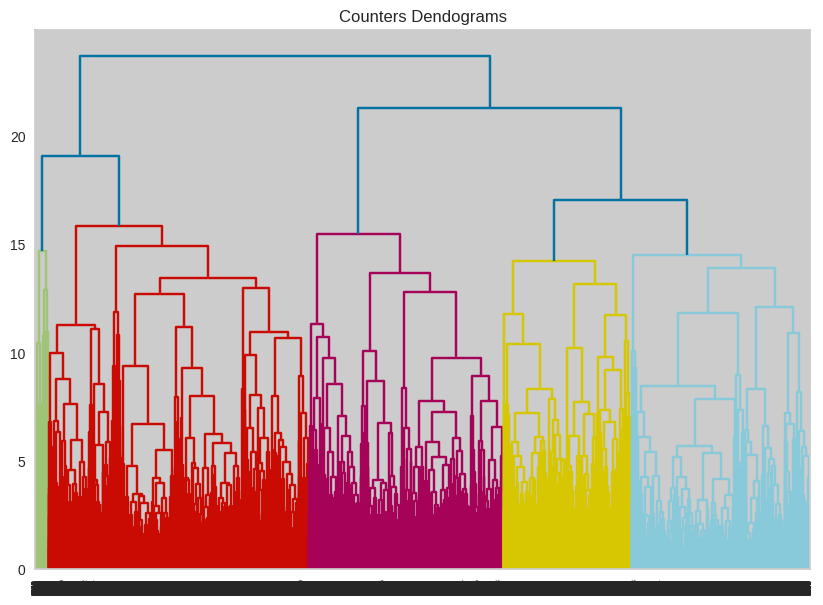

In [75]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_final, method='complete', metric='euclidean'))

In [79]:
kmeans = KMeans(n_clusters=7, random_state=42, n_init = 'auto')
label =  kmeans.fit_predict(df_final)
df_copy['label'] = label

In [80]:
tsne = TSNE(init='pca', n_components=2, perplexity=100, learning_rate=100)
tsne_data = tsne.fit_transform(df_final)

<Axes: xlabel='PC1', ylabel='PC2'>

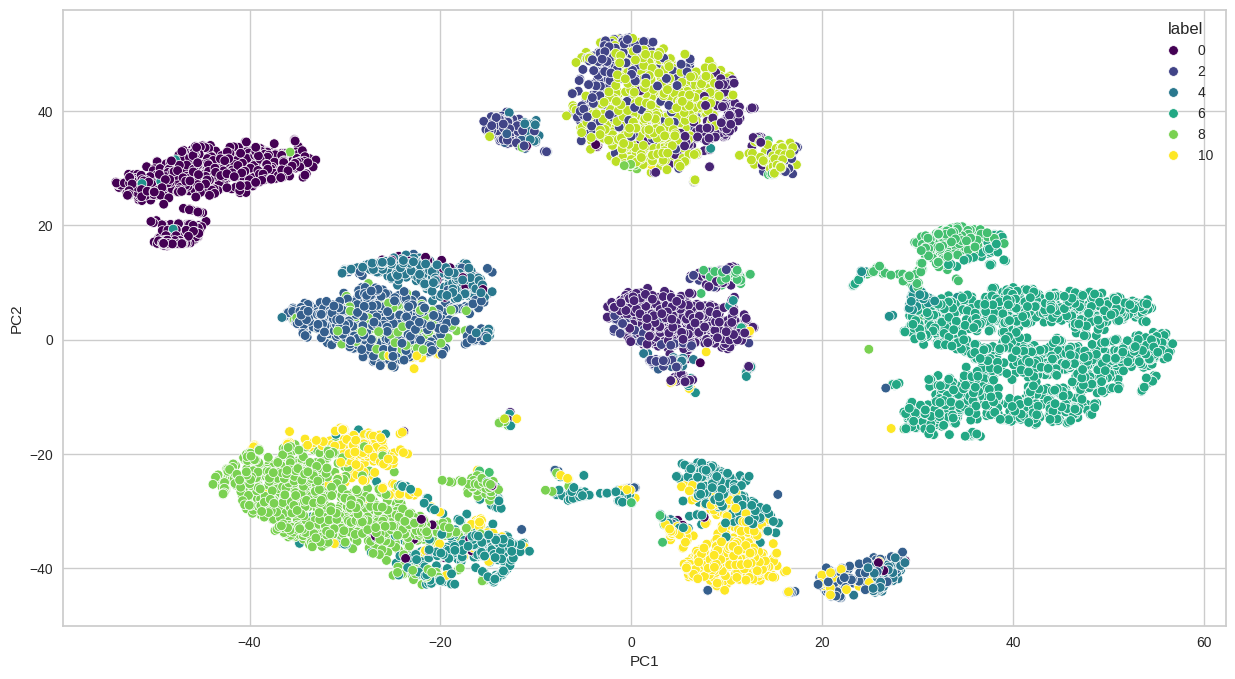

In [81]:
tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])
tsne_df['label'] = labels

plt.figure(figsize=(15, 8))
sns.scatterplot(data=tsne_df, x="PC1", y="PC2", hue="label", palette='viridis')

In [82]:
# pca
pca = PCA(n_components = 7)
pca.fit(df_final)

PCA(n_components=7)

In [83]:
df_pca = pca.transform(df_final)
df_pca.shape

(8950, 7)

In [84]:
print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.4709268  0.24263864 0.09016073 0.06605766 0.04016245 0.0325215
 0.03018661]
sum:  0.9726543945068162


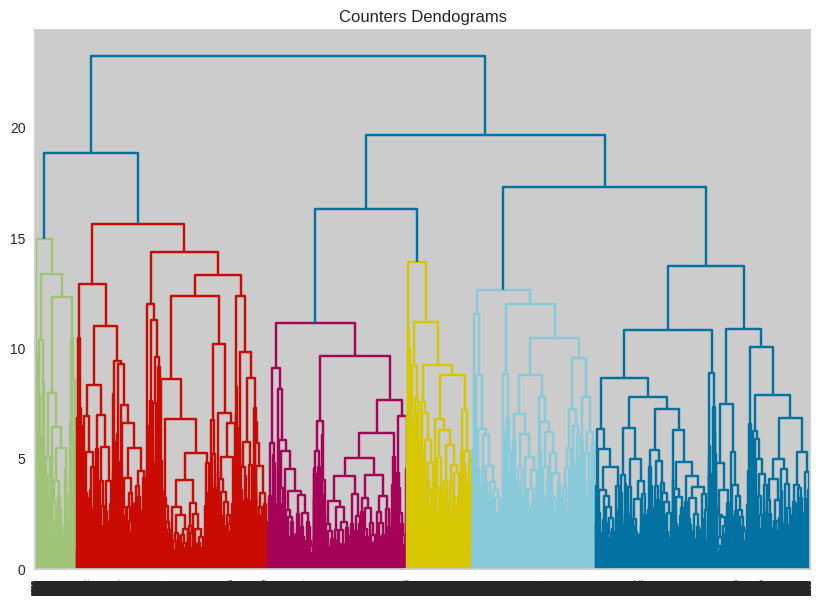

In [85]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_pca, method='complete', metric='euclidean'))

In [86]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init = 'auto')
label =  kmeans.fit_predict(df_pca)
df_copy['label'] = label

In [87]:
tsne = TSNE(init='pca', n_components=2, perplexity=100, learning_rate=100)
tsne_data = tsne.fit_transform(df_pca)

<Axes: xlabel='PC1', ylabel='PC2'>

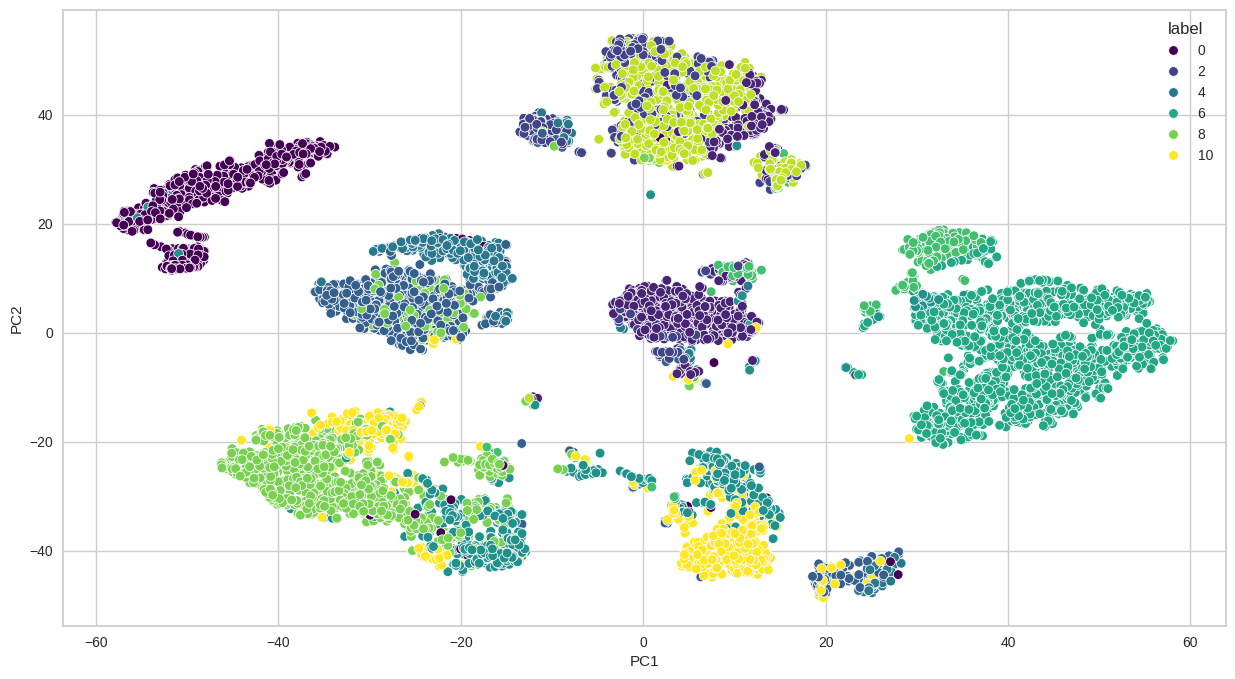

In [88]:
tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])
tsne_df['label'] = labels

plt.figure(figsize=(15, 8))
sns.scatterplot(data=tsne_df, x="PC1", y="PC2", hue="label", palette='viridis')

### log transform to all columns

In [89]:
left_cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX', 'TENURE']
df_copy[left_cols] = log_transformer.transform(df_copy[left_cols])

<Axes: xlabel='PC1', ylabel='PC2'>

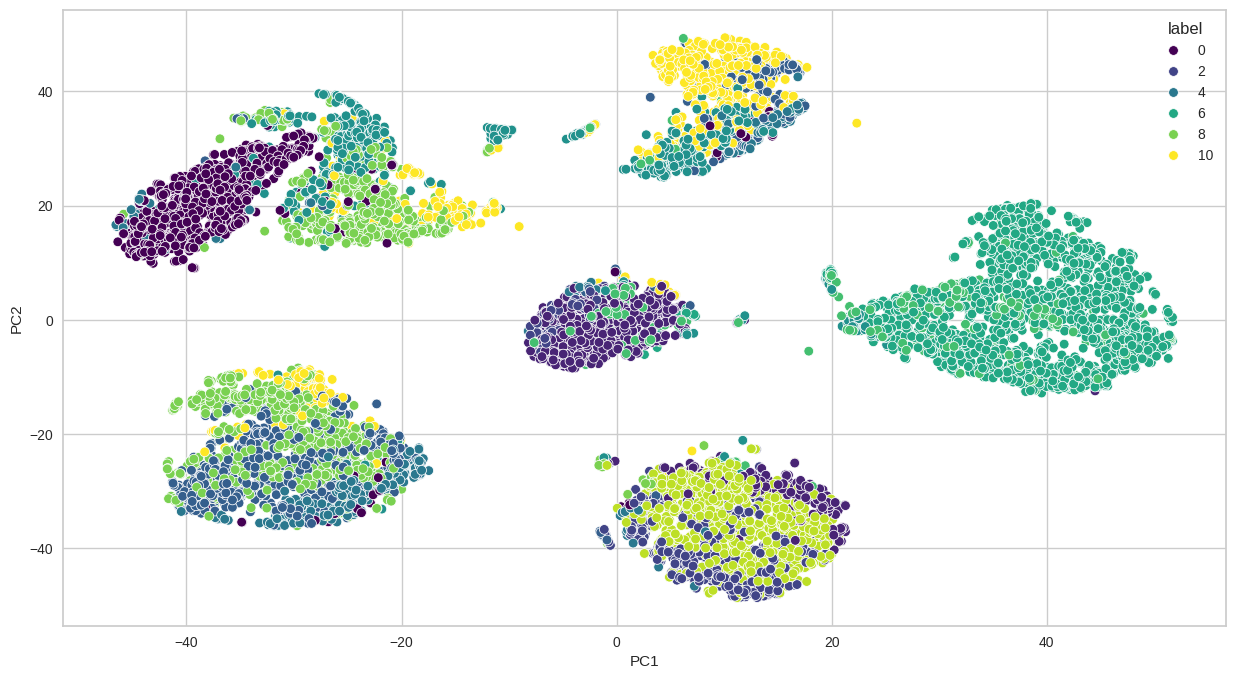

In [90]:
tsne = TSNE(init='pca', n_components=2, perplexity=100, learning_rate=100)
tsne_data = tsne.fit_transform(df_copy)

tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])
tsne_df['label'] = labels

plt.figure(figsize=(15, 8))
sns.scatterplot(data=tsne_df, x="PC1", y="PC2", hue="label", palette='viridis')

In [101]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init = 'auto')
label =  kmeans.fit_predict(df_copy)
df_copy['label'] = label

In [103]:
df_copy['label'].unique()

array([5, 2, 3, 0, 4, 1], dtype=int32)

<Axes: xlabel='PC1', ylabel='PC2'>

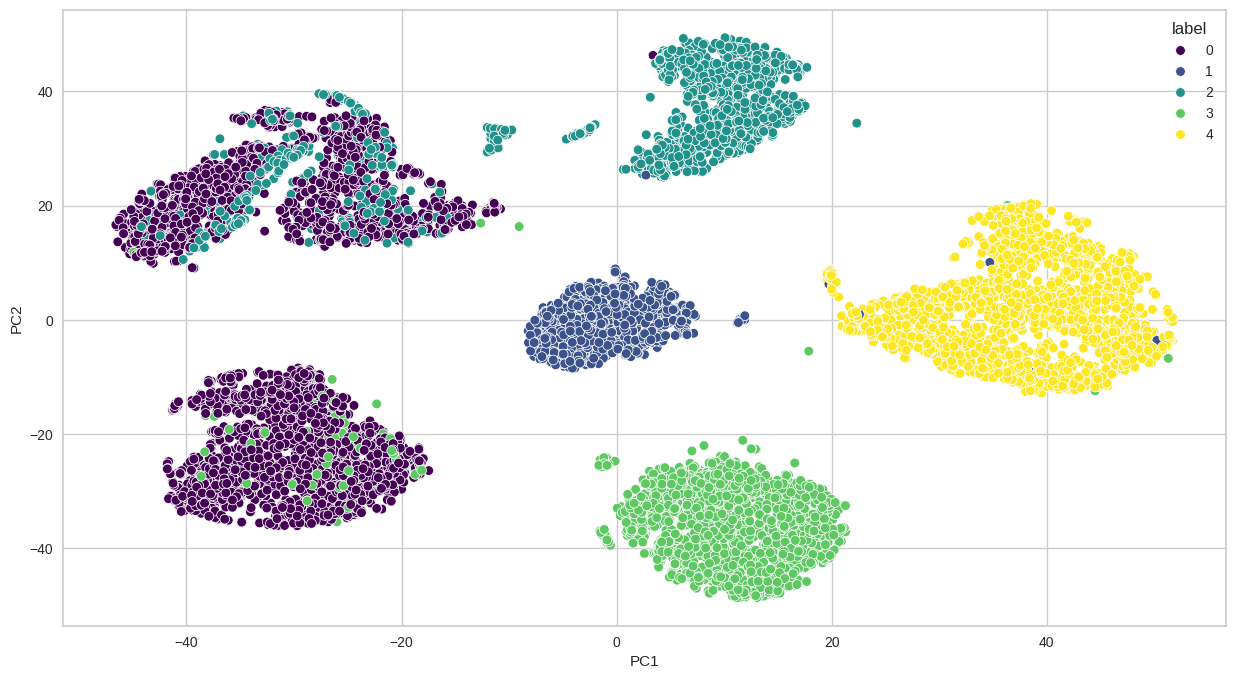

In [109]:
cluster_labels = df_copy['label']

tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])
tsne_df['label'] = labels

plt.figure(figsize=(15, 8))
sns.scatterplot(data=tsne_df, x="PC1", y="PC2", hue="label", palette='viridis')

### GGM

In [136]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6, covariance_type='full', max_iter=7000, random_state=42)
labels = gmm.fit_predict(df_copy)

df_copy['label'] = labels

<Axes: xlabel='PC1', ylabel='PC2'>

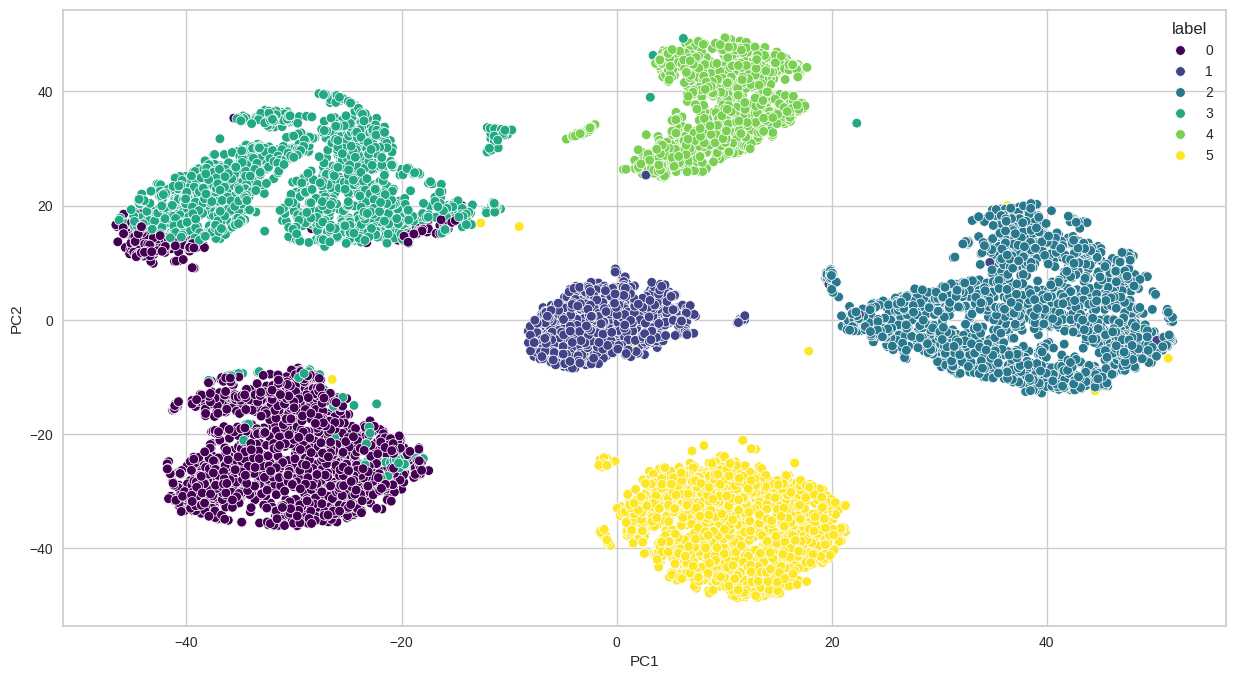

In [137]:
cluster_labels = df_copy['label']

tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])
tsne_df['label'] = labels

plt.figure(figsize=(15, 8))
sns.scatterplot(data=tsne_df, x="PC1", y="PC2", hue="label", palette='viridis')

## Conclusion

- Log transformation is the most suitable data transformation for all columns.
- The optimal clustering outcomes were achieved through the utilization of KMeans and GMM algorithms (5 clusters).

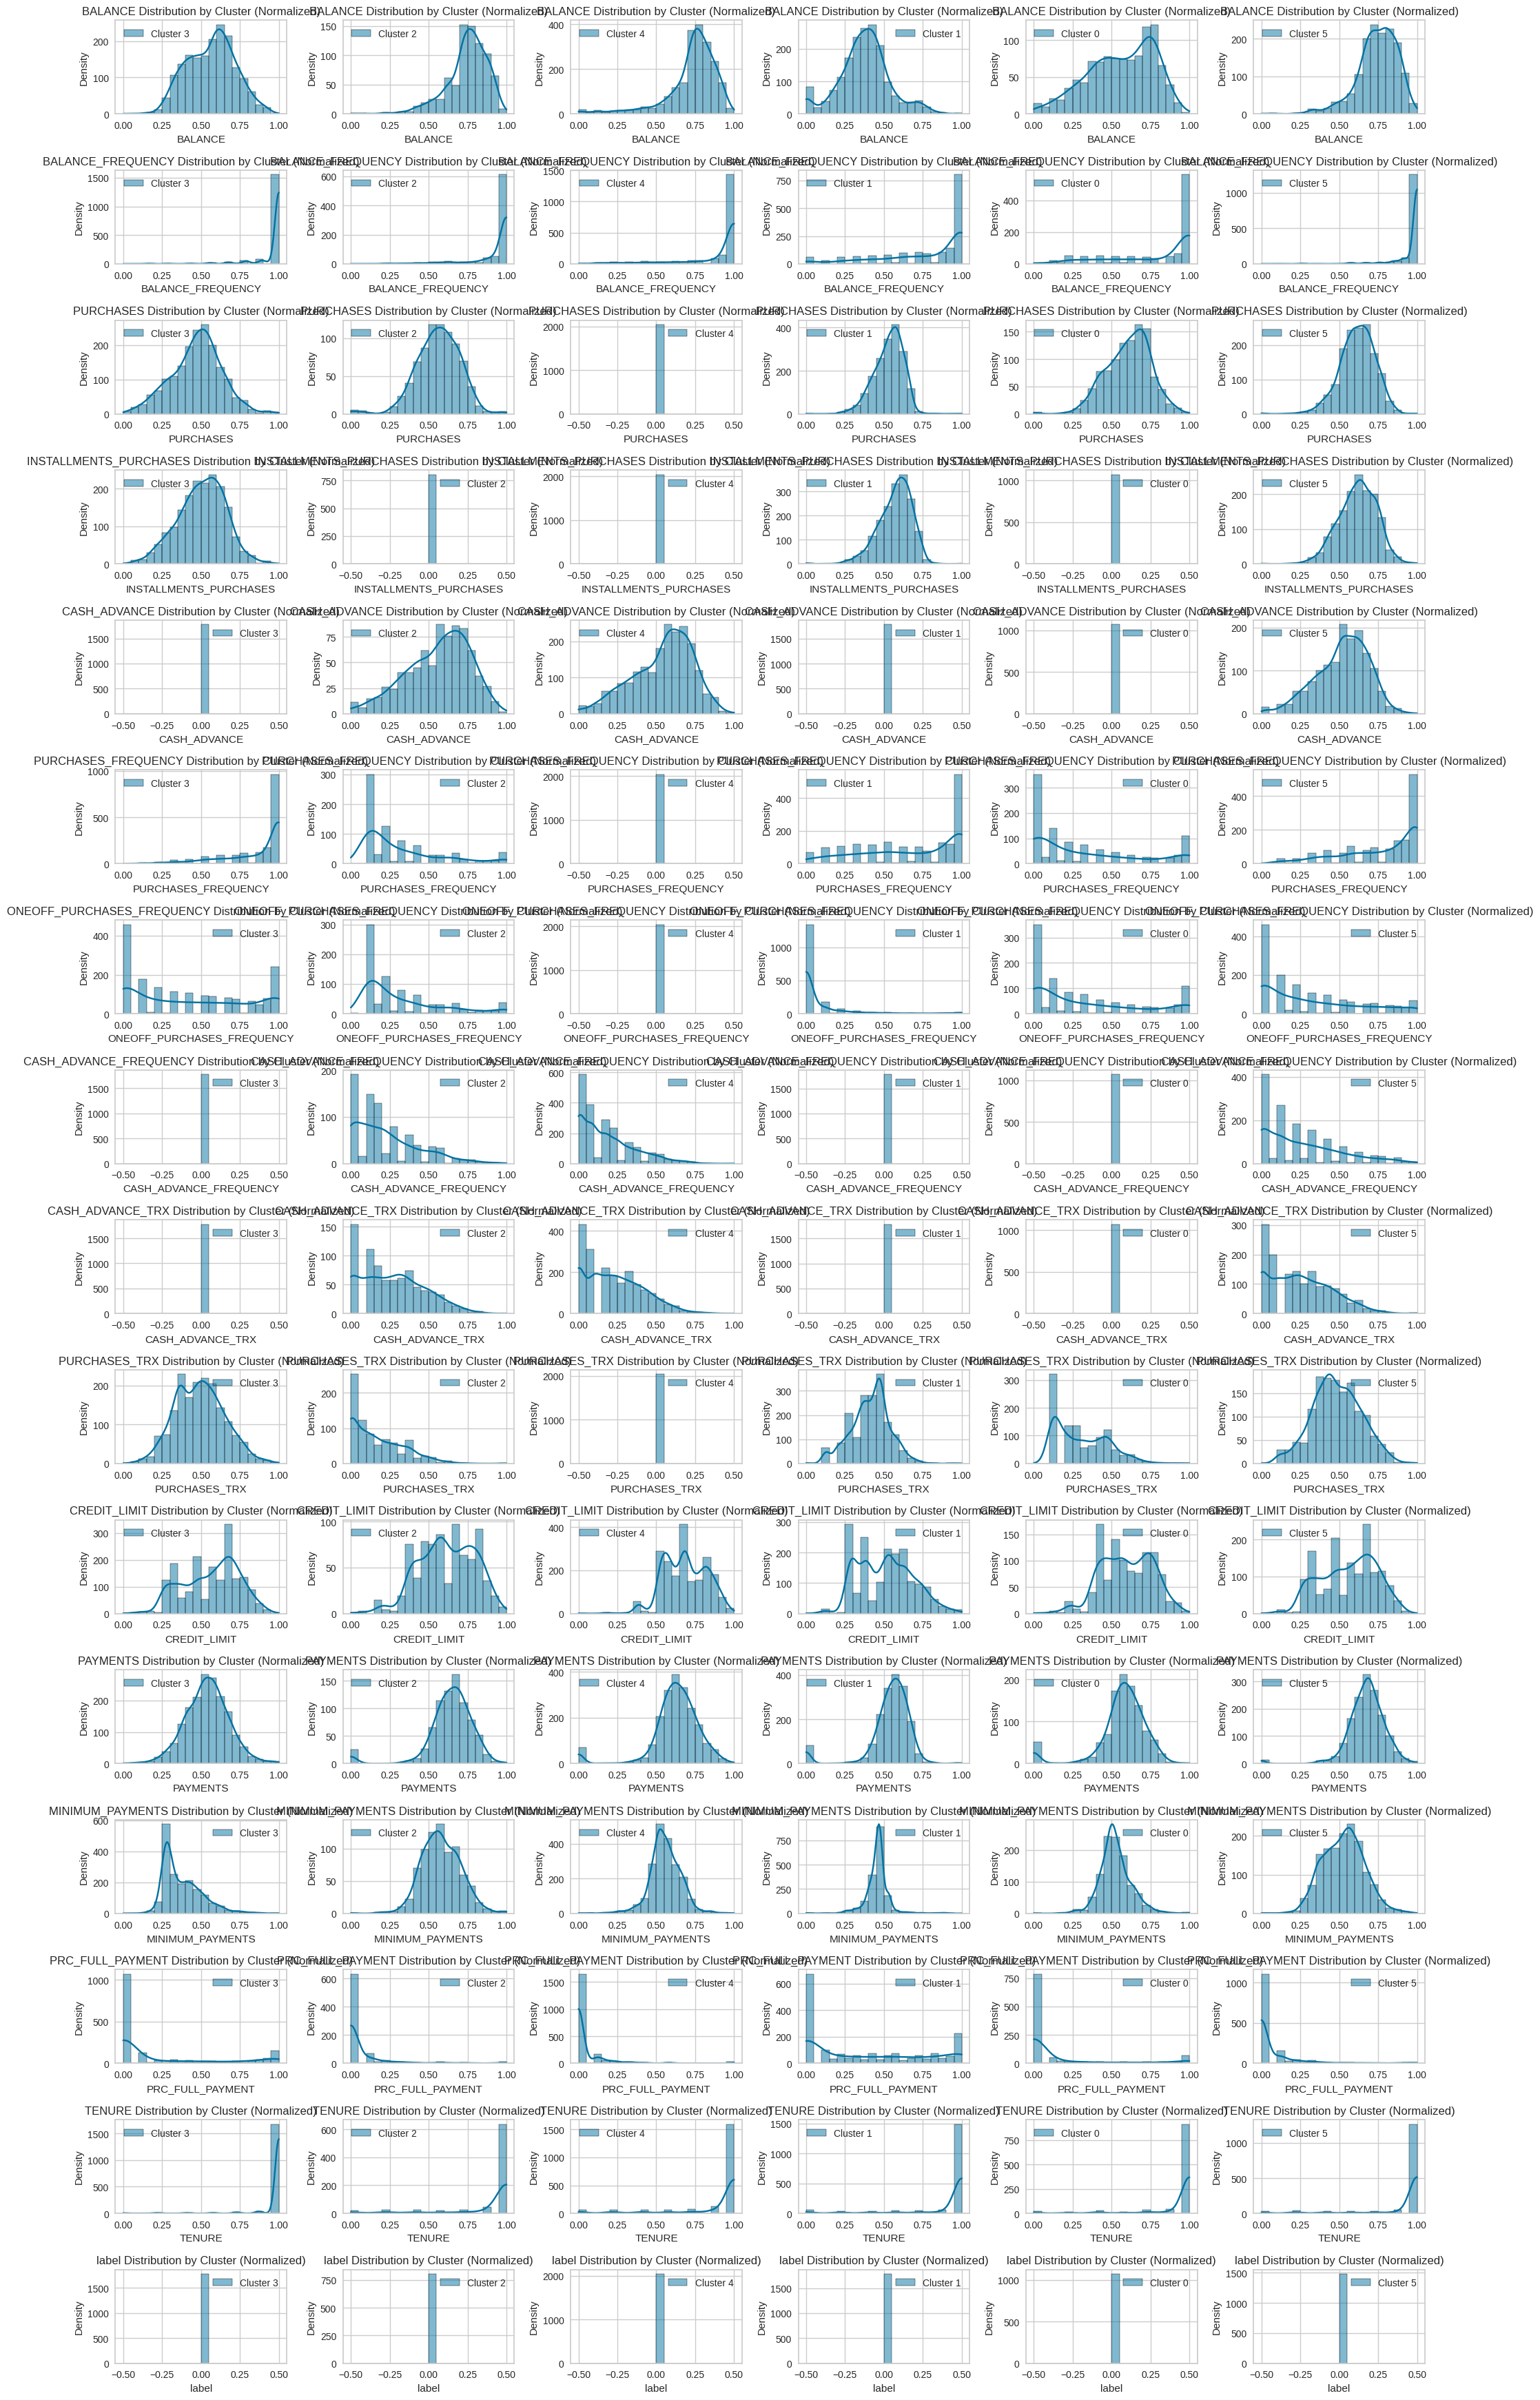

In [138]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
normalized_dfs = []

for cluster_label, group_df in df_copy.groupby('label'):
    group_df_normalized = group_df.copy()
    group_df_normalized[numerical_cols] = scaler.fit_transform(group_df_normalized[numerical_cols])
    normalized_dfs.append(group_df_normalized)

plt.figure(figsize=(20, 35))
num_clusters = len(df_copy['label'].unique())
num_numerical_cols = len(numerical_cols)
index = 1
for col in numerical_cols:
    for cluster_label, group_df_normalized in zip(df_copy['label'].unique(), normalized_dfs):
        plt.subplot(num_numerical_cols, num_clusters, index)
        cluster_data = group_df_normalized[col]
        sns.histplot(cluster_data, bins=20, alpha=0.5, label=f'Cluster {cluster_label}', kde=True)
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.title(f'{col} Distribution by Cluster (Normalized)')
        plt.legend()
        index += 1
plt.tight_layout()
plt.show()


## 8 <a name="8">clustering analysis</a>
(<a href="#0">Go to top</a>)

### From the above plot we can obtain this characteristics about each cluster:
**Cluster 0:** Characterized by high balance and purchases, but low purchase frequency and transactions. It exhibits stable installment purchases, cash advance frequency, and cash advance transactions.

**Cluster 1:** All customers within this group share the same characteristics in terms of cash advance, cash advance frequency, and cash advance transactions. They display high purchase frequency and installment purchases, with moderate balance, purchases, and purchase transactions.

**Cluster 2:** All customers in this cluster demonstrate low purchase frequency, cash advance frequency, cash advance transactions, and purchase transactions. They exhibit moderate purchases and high cash advance and balance, with consistent installment purchases.

**Cluster 3:** All customers in this group share identical characteristics in terms of cash advance, cash advance frequency, and cash advance transactions. They display high purchase frequency and moderate balance, purchases, installment purchases, and purchase transactions.

**Cluster 4:** This cluster shows low cash advance frequency and cash advance transactions, but high balance and cash advance. Purchase-related metrics such as purchases, installment purchases, purchase frequency, one-off purchases frequency, and purchase transactions are stable within this cluster.

**Cluster 5:** Characterized by high balance, purchases, and installment purchases, along with cash advance and purchase frequency. It has low cash advance frequency and cash advance transactions, with moderate purchase transactions.

**notes for me:**
- check transformation with tsne (just the structure without any labeling or coloring, if there is boundries between clusters)
- sil... score >> not good and that's ok in our case
- Don't forget to write some insights about each cluster with some visuals

In [100]:
%%shell
jupyter nbconvert --to html /content/K_means_application.ipynb

[NbConvertApp] Converting notebook /content/K_means_application.ipynb to html
[NbConvertApp] Writing 10219751 bytes to /content/K_means_application.html
